# CR 6 RSM

## Load Packages

In [1]:
## Load Packages
## Install R Packages

install.packages("rsm")
library(rsm)

library(reshape2)


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message:
“package ‘reshape2’ was built under R version 3.6.3”


In [ ]:
# Layer Thickness = lh
lh_low = .16 
lh_hi = .24 

# Print Speed = ps
ps_low = 50 
ps_hi = 60 

# Infill Density = id
id_low = .25 
id_hi = .15 

# Raster Width = rw
rw_low = .4 
rw_hi = .8 

# Wall Thicknessv = wt
wt_low = 1.2 
wt_hi = .8

## Read data and save relevant variables.

In [2]:
## Read data and save relevant variables.

fn.data.cost <- "https://raw.githubusercontent.com/wilsongis/3DP_Experiments/main/Data/cr6_cost.txt"
fn.data.time <- "https://raw.githubusercontent.com/wilsongis/3DP_Experiments/main/Data/cr6_time.txt"
df <- read.table(fn.data.cost, header=TRUE)
str(df)

'data.frame':	16 obs. of  10 variables:
 $ lh   : int  -1 1 -1 1 -1 1 -1 1 -1 1 ...
 $ ps   : int  -1 -1 1 1 -1 -1 1 1 -1 -1 ...
 $ id   : int  -1 -1 -1 -1 1 1 1 1 -1 -1 ...
 $ wt   : int  -1 -1 -1 -1 -1 -1 -1 -1 1 1 ...
 $ rw   : int  1 -1 -1 1 -1 1 1 -1 -1 1 ...
 $ cost1: num  0.51 0.51 0.54 0.51 0.54 0.5 0.5 0.54 0.54 0.56 ...
 $ cost2: num  0.51 0.51 0.54 0.51 0.54 0.5 0.5 0.54 0.54 0.56 ...
 $ cost3: num  0.51 0.51 0.54 0.51 0.54 0.5 0.5 0.54 0.54 0.56 ...
 $ cost4: num  0.51 0.51 0.54 0.51 0.54 0.5 0.5 0.54 0.54 0.56 ...
 $ cost5: num  0.51 0.48 0.54 0.51 0.54 0.5 0.5 0.54 0.54 0.56 ...


In [3]:
df

lh,ps,id,wt,rw,cost1,cost2,cost3,cost4,cost5
<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-1,-1,-1,-1,1,0.51,0.51,0.51,0.51,0.51
1,-1,-1,-1,-1,0.51,0.51,0.51,0.51,0.48
-1,1,-1,-1,-1,0.54,0.54,0.54,0.54,0.54
1,1,-1,-1,1,0.51,0.51,0.51,0.51,0.51
-1,-1,1,-1,-1,0.54,0.54,0.54,0.54,0.54
1,-1,1,-1,1,0.50,0.50,0.50,0.50,0.50
-1,1,1,-1,1,0.50,0.50,0.50,0.50,0.50
1,1,1,-1,-1,0.54,0.54,0.54,0.54,0.54
-1,-1,-1,1,-1,0.54,0.54,0.54,0.54,0.54


In [4]:
# reshape data into long format
df.cost <- melt(df, id.vars = c("lh", "ps", "id", "wt", "rw", "alh", "aps", "aid", "awt", "arw"), variable.name = "rep", value.name = "cost")

In [5]:
# Summary of the original data

summary(df.cost)

       lh           ps           id           wt           rw        rep    
 Min.   :-1   Min.   :-1   Min.   :-1   Min.   :-1   Min.   :-1   cost1:16  
 1st Qu.:-1   1st Qu.:-1   1st Qu.:-1   1st Qu.:-1   1st Qu.:-1   cost2:16  
 Median : 0   Median : 0   Median : 0   Median : 0   Median : 0   cost3:16  
 Mean   : 0   Mean   : 0   Mean   : 0   Mean   : 0   Mean   : 0   cost4:16  
 3rd Qu.: 1   3rd Qu.: 1   3rd Qu.: 1   3rd Qu.: 1   3rd Qu.: 1   cost5:16  
 Max.   : 1   Max.   : 1   Max.   : 1   Max.   : 1   Max.   : 1             
      cost       
 Min.   :0.4800  
 1st Qu.:0.5100  
 Median :0.5400  
 Mean   :0.5315  
 3rd Qu.:0.5400  
 Max.   :0.5600  

# Modelling

## Cost RSM

In [33]:
cost_rsm <- rsm(cost ~ SO(lh, ps, id, wt, rw), data = df.cost)

Warning message in rsm(cost ~ SO(lh, ps, id, wt, rw), data = df.cost):
“Some coefficients are aliased - cannot use 'rsm' methods.
  Returning an 'lm' object.”


In [34]:
# externally Studentized residuals
cost_rsm$studres <- rstudent(cost_rsm)
summary(cost_rsm)


Call:
rsm(formula = cost ~ SO(lh, ps, id, wt, rw), data = df.cost)

Residuals:
   Min     1Q Median     3Q    Max 
-0.024  0.000  0.000  0.000  0.006 

Coefficients: (5 not defined because of singularities)
                              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)                   0.531500   0.000375 1417.333  < 2e-16 ***
FO(lh, ps, id, wt, rw)lh     -0.002250   0.000375   -6.000 1.01e-07 ***
FO(lh, ps, id, wt, rw)ps      0.002250   0.000375    6.000 1.01e-07 ***
FO(lh, ps, id, wt, rw)id     -0.001500   0.000375   -4.000 0.000167 ***
FO(lh, ps, id, wt, rw)wt      0.013500   0.000375   36.000  < 2e-16 ***
FO(lh, ps, id, wt, rw)rw     -0.004000   0.000375  -10.667 7.80e-16 ***
TWI(lh, ps, id, wt, rw)lh:ps  0.001000   0.000375    2.667 0.009690 ** 
TWI(lh, ps, id, wt, rw)lh:id  0.002250   0.000375    6.000 1.01e-07 ***
TWI(lh, ps, id, wt, rw)lh:wt  0.002250   0.000375    6.000 1.01e-07 ***
TWI(lh, ps, id, wt, rw)lh:rw  0.002250   0.000375    6.000 1.01e-07 ***


In [35]:
## generate ANOVA table for selected model
anova(cost_rsm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
"FO(lh, ps, id, wt, rw)",5,0.01685,3.370e-03,299.5556,5.426872e-43
"TWI(lh, ps, id, wt, rw)",10,0.01285,1.285e-03,114.2222,7.421372e-37
Residuals,64,0.00072,1.125e-05,NA,NA


## 3 Level Interactions

In [36]:
lm_cost3lvl <- lm(cost ~ (lh+ ps+ id+ wt+ rw)^3, data = df.cost)
# externally Studentized residuals
lm_cost3lvl$studres <- rstudent(lm_cost3lvl)
summary(lm_cost3lvl)


Call:
lm(formula = cost ~ (lh + ps + id + wt + rw)^3, data = df.cost)

Residuals:
   Min     1Q Median     3Q    Max 
-0.024  0.000  0.000  0.000  0.006 

Coefficients: (10 not defined because of singularities)
             Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  0.531500   0.000375 1417.333  < 2e-16 ***
lh          -0.002250   0.000375   -6.000 1.01e-07 ***
ps           0.002250   0.000375    6.000 1.01e-07 ***
id          -0.001500   0.000375   -4.000 0.000167 ***
wt           0.013500   0.000375   36.000  < 2e-16 ***
rw          -0.004000   0.000375  -10.667 7.80e-16 ***
lh:ps        0.001000   0.000375    2.667 0.009690 ** 
lh:id        0.002250   0.000375    6.000 1.01e-07 ***
lh:wt        0.002250   0.000375    6.000 1.01e-07 ***
lh:rw        0.002250   0.000375    6.000 1.01e-07 ***
ps:id       -0.002250   0.000375   -6.000 1.01e-07 ***
ps:wt       -0.002250   0.000375   -6.000 1.01e-07 ***
ps:rw       -0.002250   0.000375   -6.000 1.01e-07 ***
id:wt       -0.003

## Cost Interaction Plots

In [10]:
### Interactions: Layer Height

In [37]:
## Generate interaction plots.

par(mfrow=c(2,1), bg=rgb(1,1,0.8), mar=c(5, 8, 2, 4))

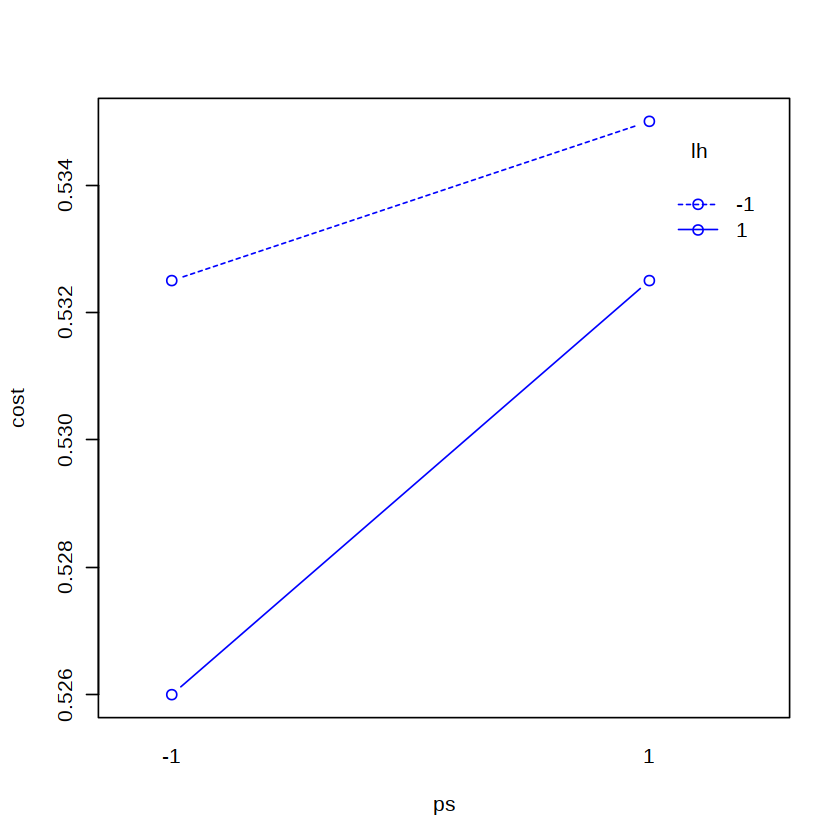

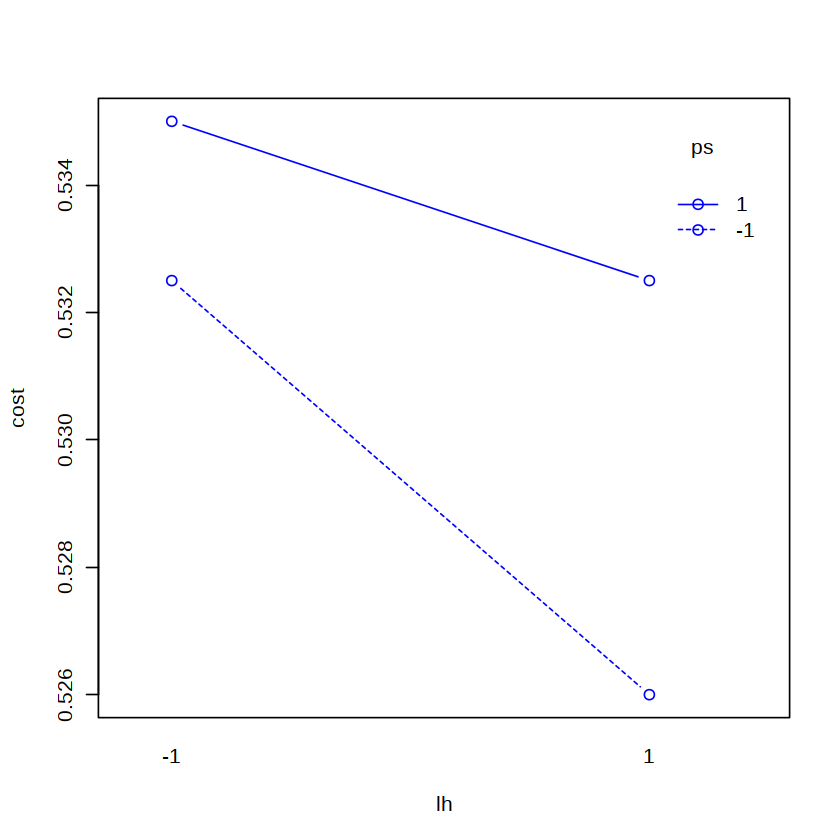

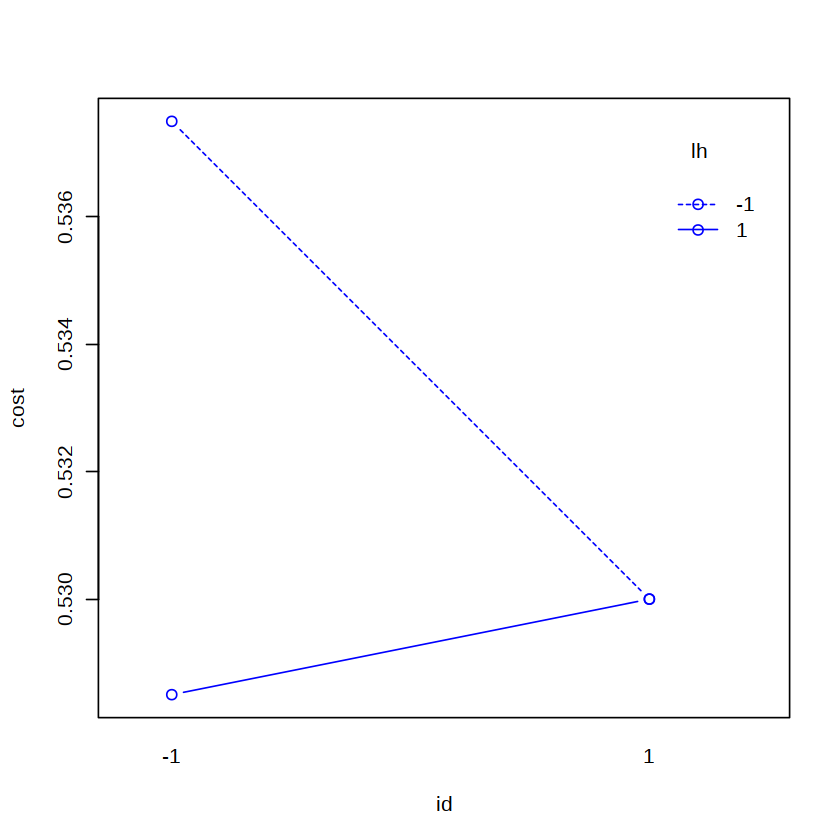

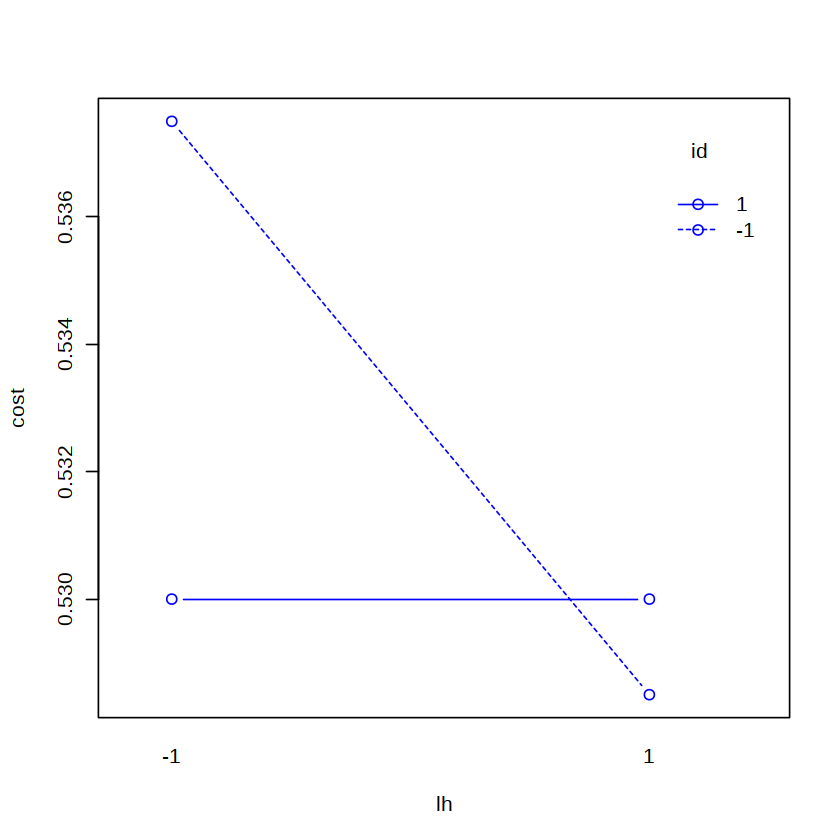

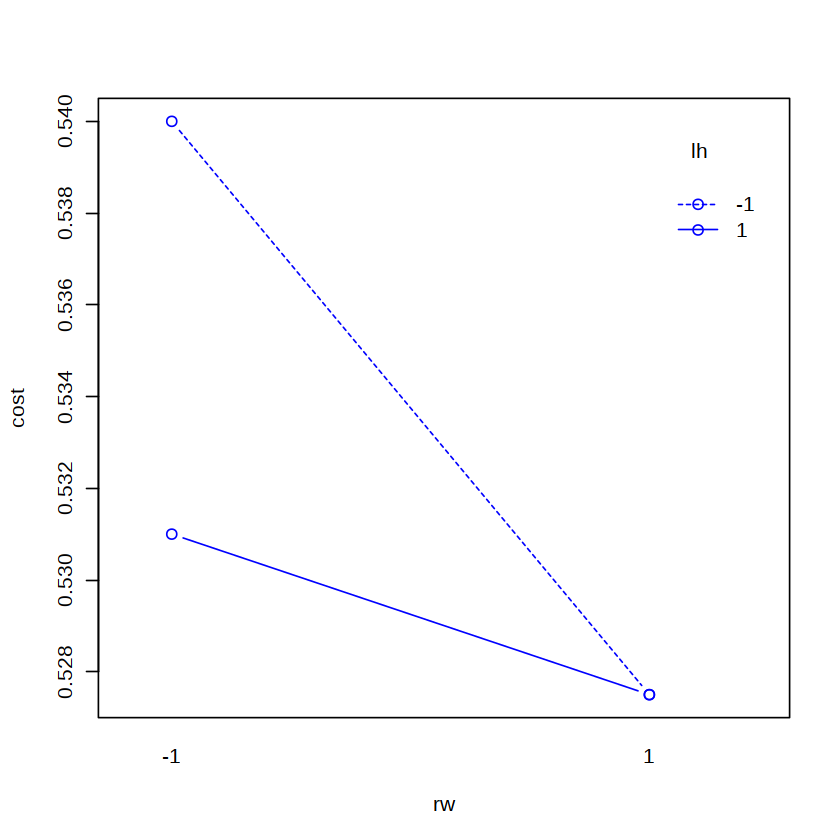

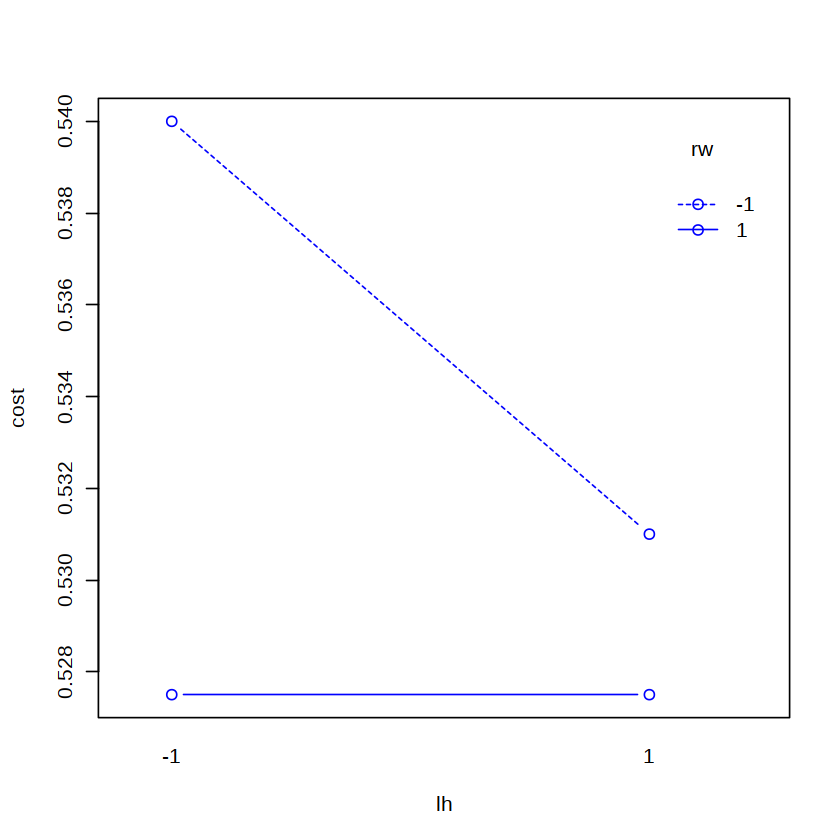

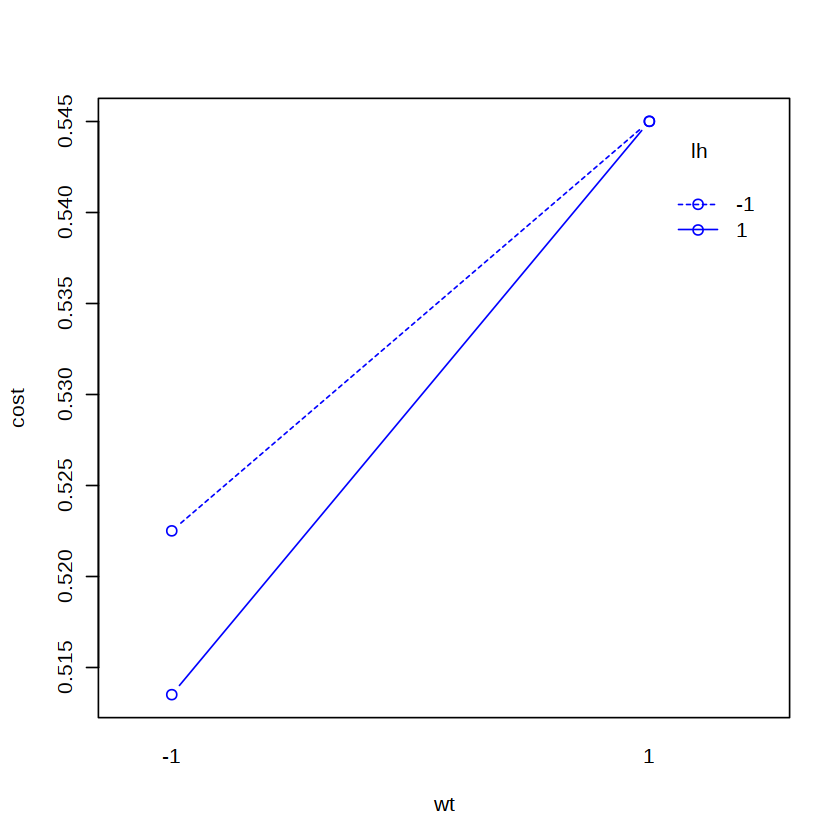

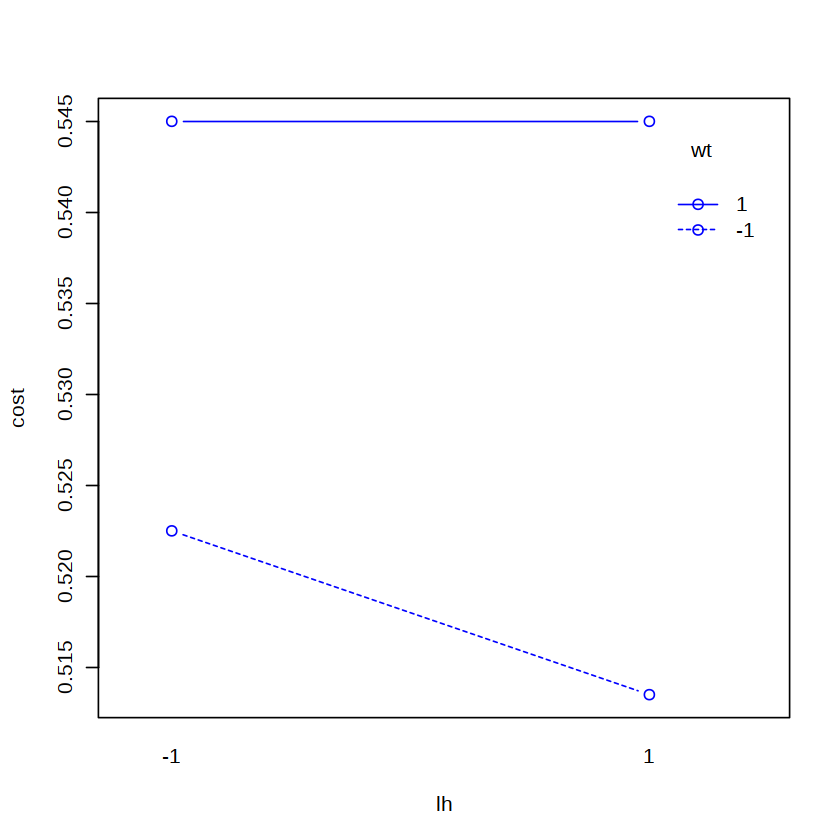

In [38]:
interaction.plot(df.cost$ps, df.cost$lh, df.cost$cost, fun=mean,type="b", pch=c(21,21), col=4,xlab="ps", ylab="cost", trace.lab="lh")

interaction.plot(df.cost$lh, df.cost$ps, df.cost$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="ps", ylab="cost", xlab="lh")

interaction.plot(df.cost$id, df.cost$lh, df.cost$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="id", ylab="cost", trace.lab="lh")

interaction.plot(df.cost$lh, df.cost$id, df.cost$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="id", ylab="cost", xlab="lh")

interaction.plot(df.cost$rw, df.cost$lh, df.cost$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="rw", ylab="cost", trace.lab="lh")

interaction.plot(df.cost$lh, df.cost$rw, df.cost$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="rw", ylab="cost", xlab="lh")

interaction.plot(df.cost$wt, df.cost$lh, df.cost$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="wt", ylab="cost", trace.lab="lh")

interaction.plot(df.cost$lh, df.cost$wt, df.cost$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="wt", ylab="cost", xlab="lh")

### Interactions: Print Speed (ps)

In [39]:
dfp = subset(df,ps==50|ps==60)

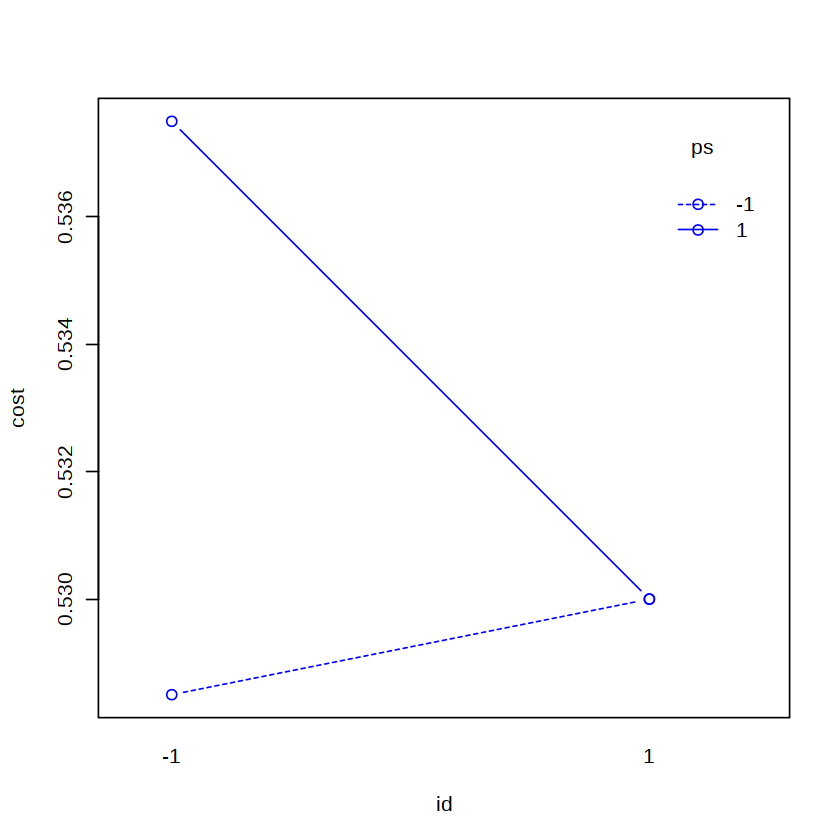

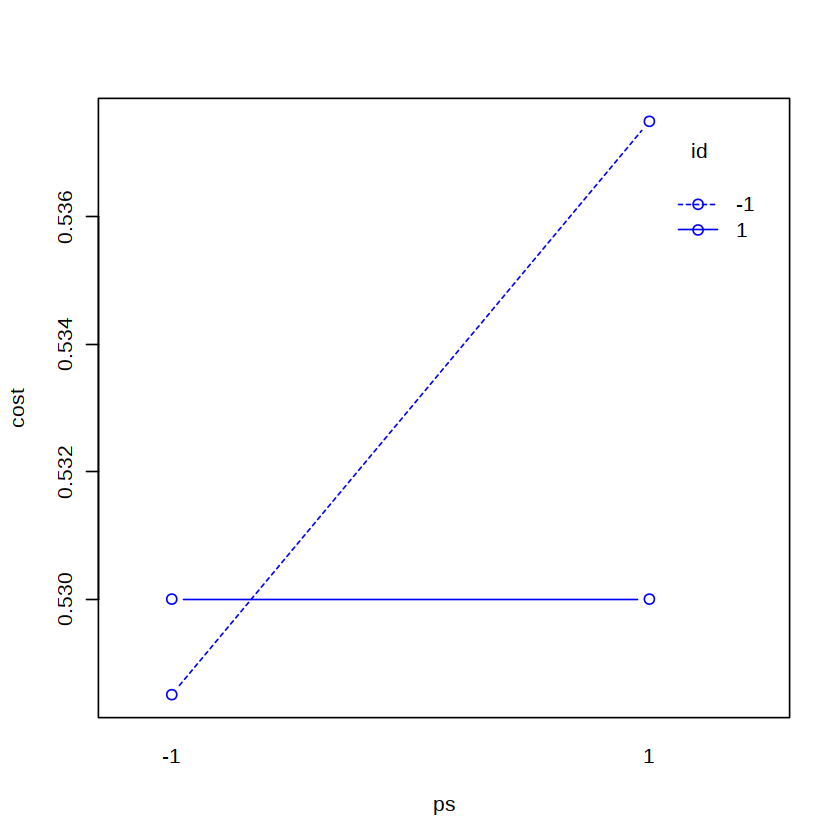

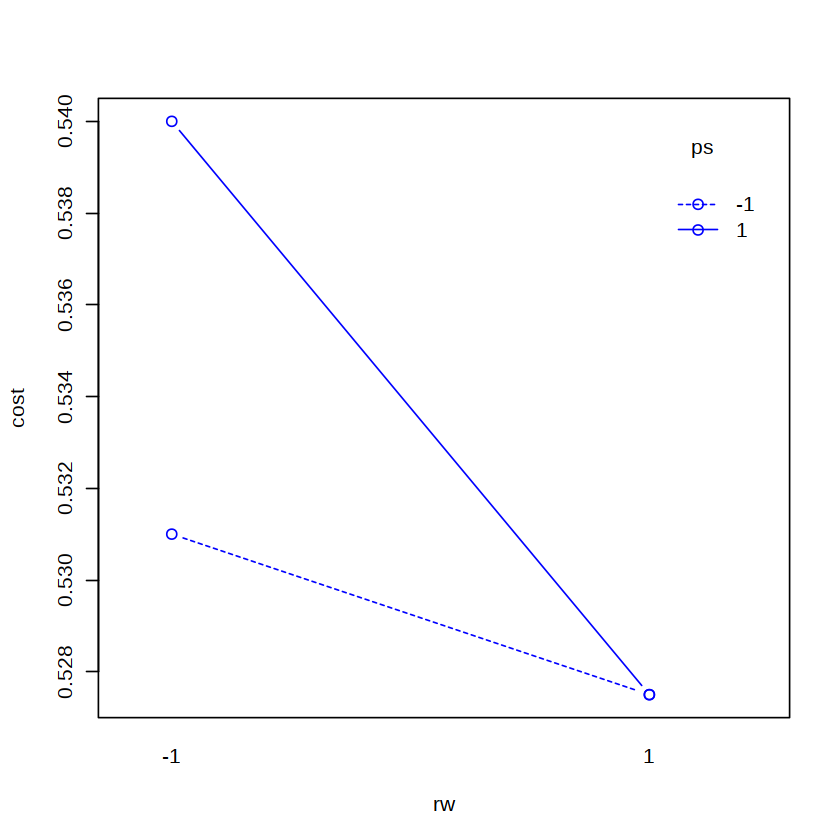

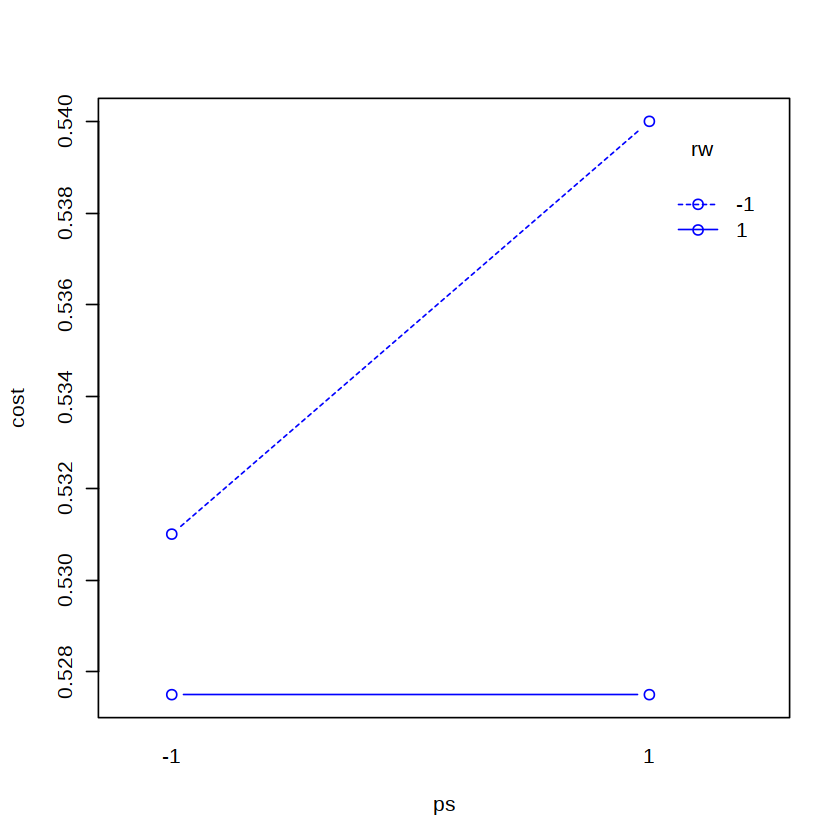

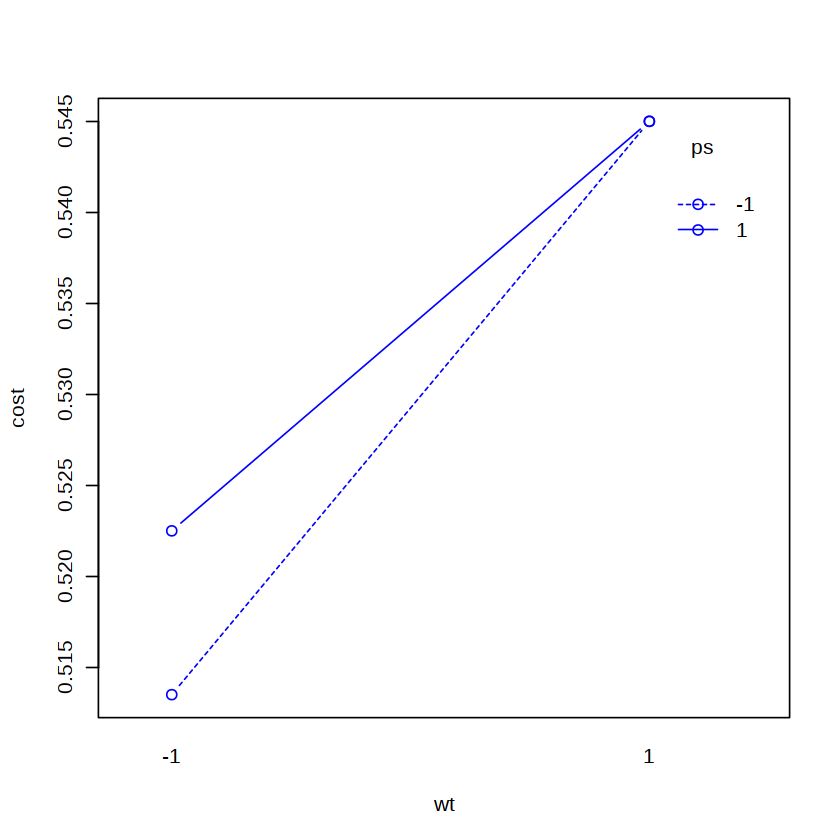

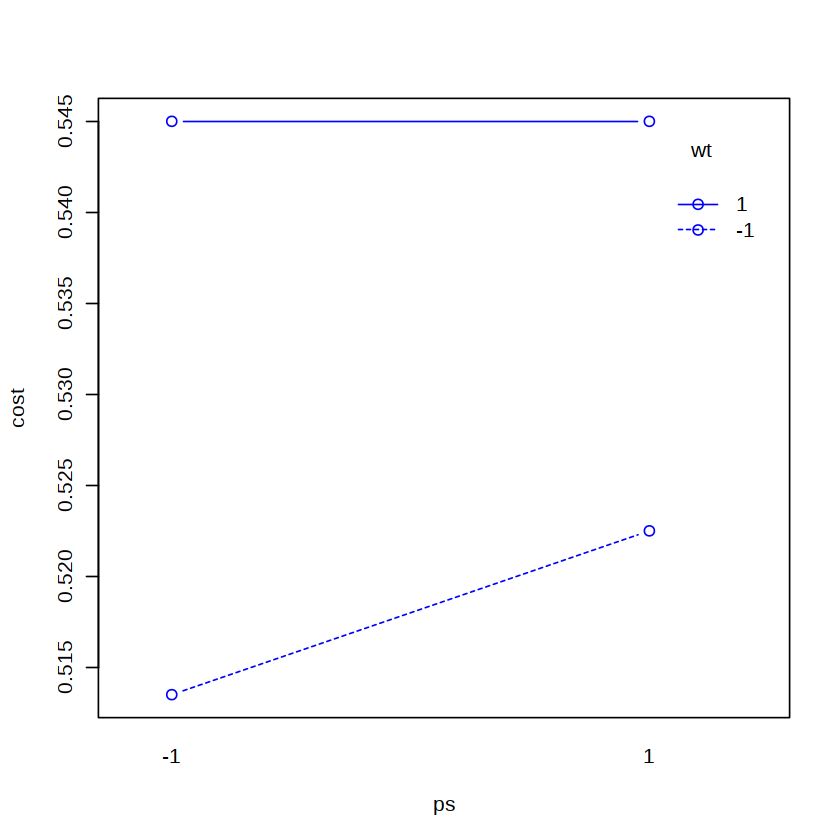

In [14]:
interaction.plot(df.cost$id, df.cost$ps, df.cost$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="id", ylab="cost", trace.lab="ps")

interaction.plot(df.cost$ps, df.cost$id, df.cost$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="id", ylab="cost", xlab="ps")

interaction.plot(df.cost$rw, df.cost$ps, df.cost$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="rw", ylab="cost", trace.lab="ps")

interaction.plot(df.cost$ps, df.cost$rw, df.cost$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="rw", ylab="cost", xlab="ps")

interaction.plot(df.cost$wt, df.cost$ps, df.cost$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="wt", ylab="cost", trace.lab="ps")

interaction.plot(df.cost$ps, df.cost$wt, df.cost$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="wt", ylab="cost", xlab="ps")


### Interactions: Infill Density (id)

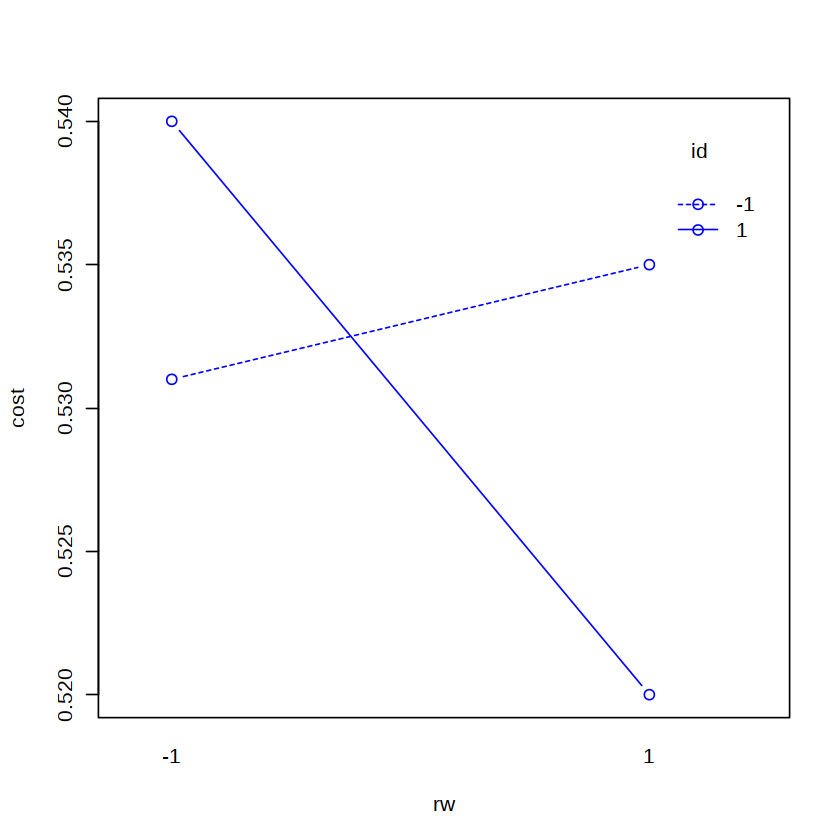

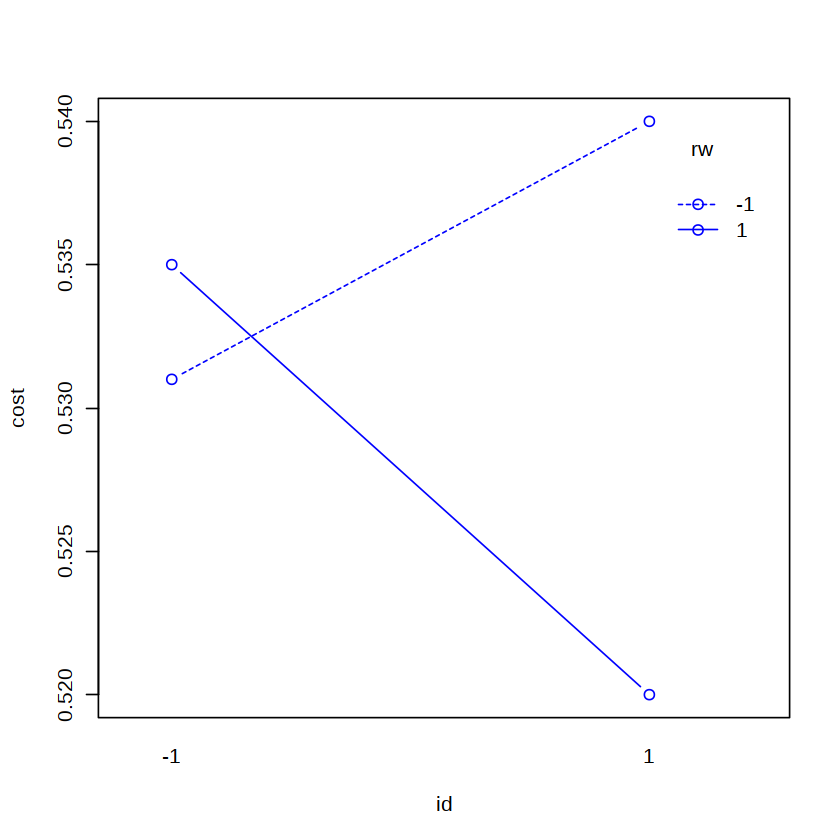

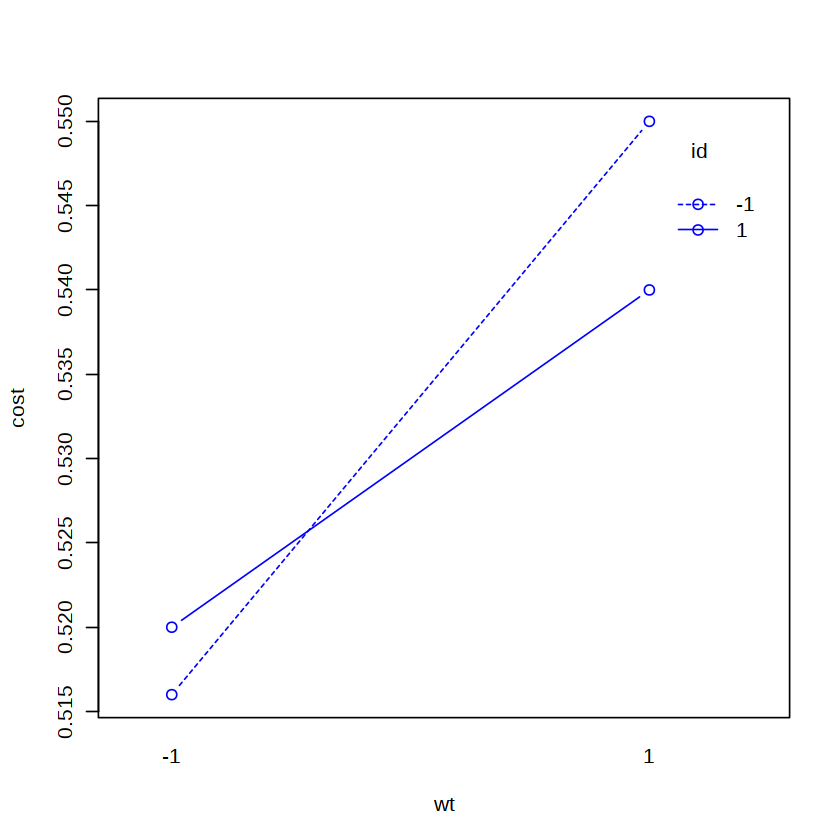

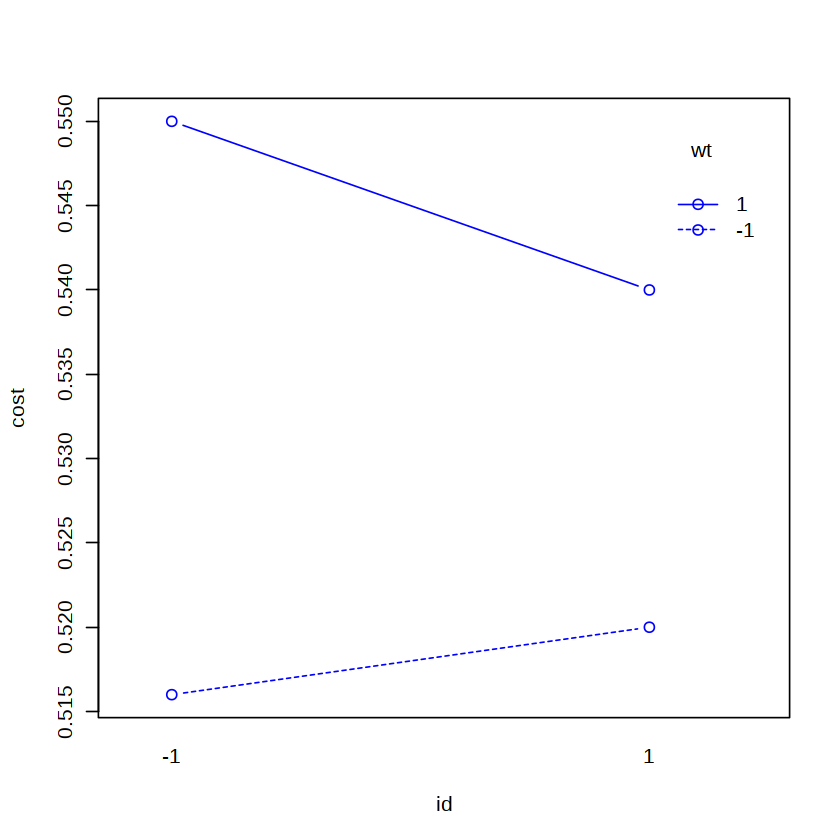

In [15]:
interaction.plot(df.cost$rw, df.cost$id, df.cost$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="rw", ylab="cost", trace.lab="id")

interaction.plot(df.cost$id, df.cost$rw, df.cost$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="rw", ylab="cost", xlab="id")

interaction.plot(df.cost$wt, df.cost$id, df.cost$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="wt", ylab="cost", trace.lab="id")

interaction.plot(df.cost$id, df.cost$wt, df.cost$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="wt", ylab="cost", xlab="id")

### Interactions: Raster Width (rw)

### rw vs wt

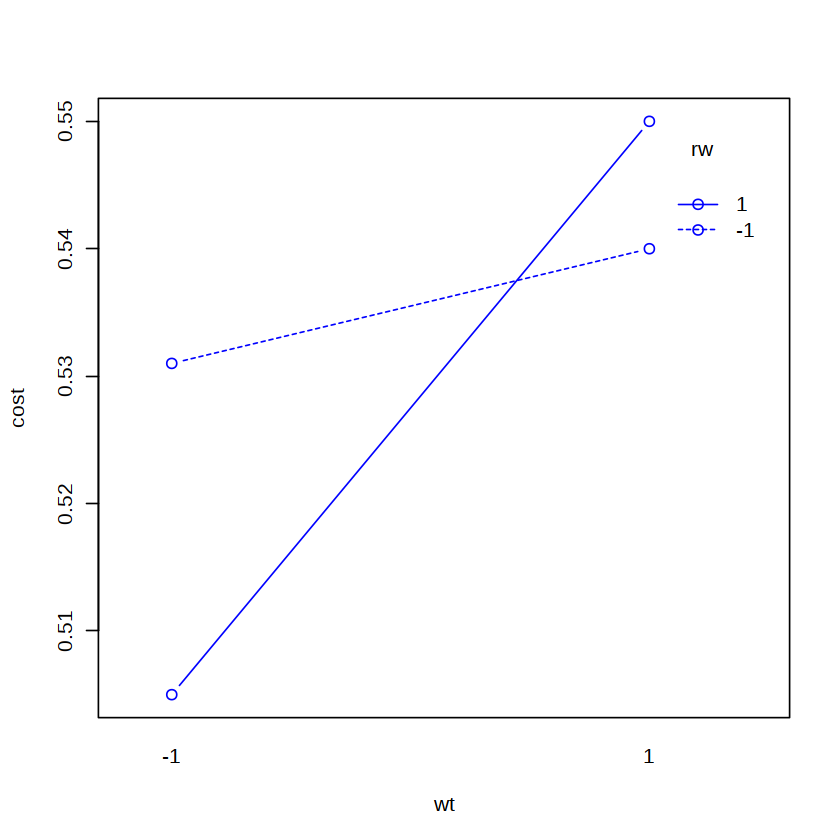

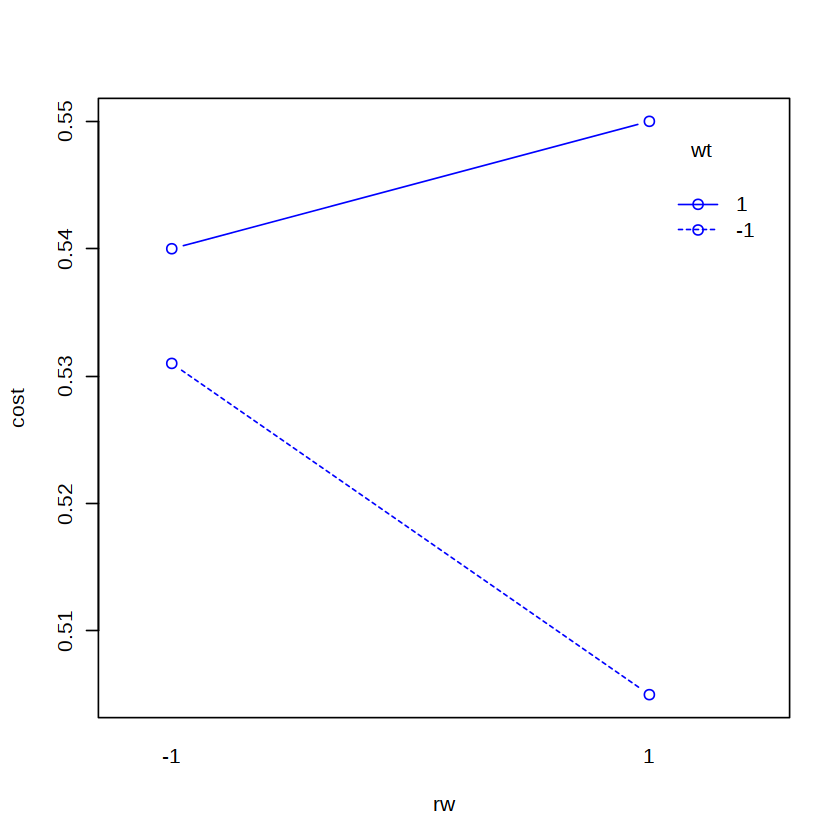

In [16]:
interaction.plot(df.cost$wt, df.cost$rw, df.cost$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="wt", ylab="cost", trace.lab="rw")

interaction.plot(df.cost$rw, df.cost$wt, df.cost$cost, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="wt", ylab="cost", xlab="rw")

# Cost Response Surface Models

In [17]:
summary(cost_rsm)


Call:
rsm(formula = cost ~ SO(lh, ps, id, wt, rw), data = df.cost)

Residuals:
   Min     1Q Median     3Q    Max 
-0.024  0.000  0.000  0.000  0.006 

Coefficients: (5 not defined because of singularities)
                              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)                   0.531500   0.000375 1417.333  < 2e-16 ***
FO(lh, ps, id, wt, rw)lh     -0.002250   0.000375   -6.000 1.01e-07 ***
FO(lh, ps, id, wt, rw)ps      0.002250   0.000375    6.000 1.01e-07 ***
FO(lh, ps, id, wt, rw)id     -0.001500   0.000375   -4.000 0.000167 ***
FO(lh, ps, id, wt, rw)wt      0.013500   0.000375   36.000  < 2e-16 ***
FO(lh, ps, id, wt, rw)rw     -0.004000   0.000375  -10.667 7.80e-16 ***
TWI(lh, ps, id, wt, rw)lh:ps  0.001000   0.000375    2.667 0.009690 ** 
TWI(lh, ps, id, wt, rw)lh:id  0.002250   0.000375    6.000 1.01e-07 ***
TWI(lh, ps, id, wt, rw)lh:wt  0.002250   0.000375    6.000 1.01e-07 ***
TWI(lh, ps, id, wt, rw)lh:rw  0.002250   0.000375    6.000 1.01e-07 ***


In [18]:
aov(cost_rsm)

Call:
   aov(formula = cost_rsm)

Terms:
                FO(lh, ps, id, wt, rw) TWI(lh, ps, id, wt, rw) Residuals
Sum of Squares                 0.01685                 0.01285   0.00072
Deg. of Freedom                      5                      10        64

Residual standard error: 0.003354102
5 out of 21 effects not estimable
Estimated effects are balanced

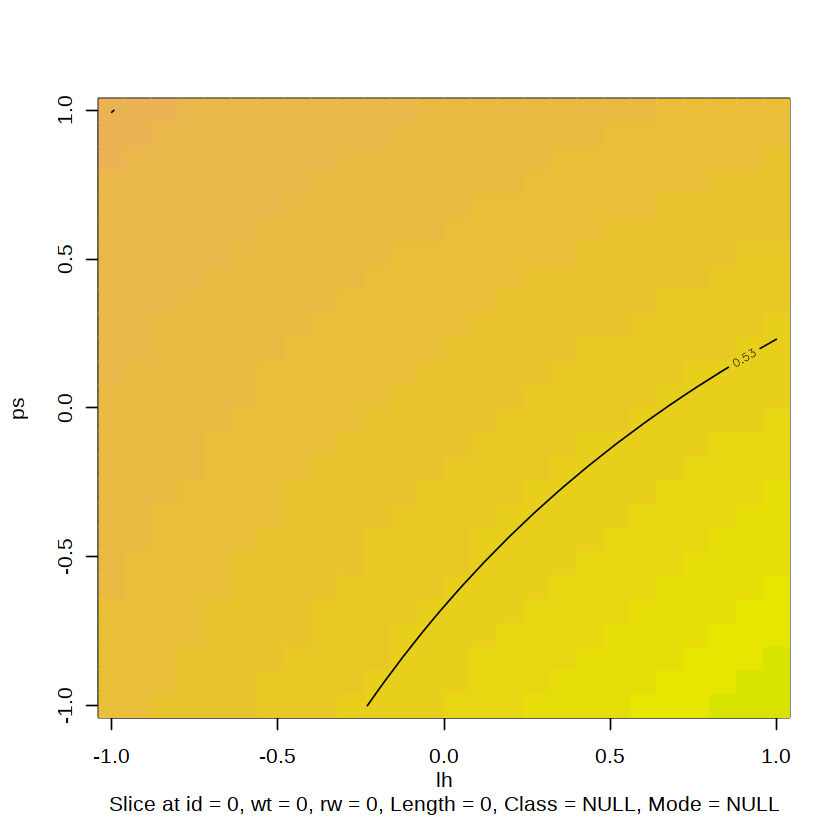

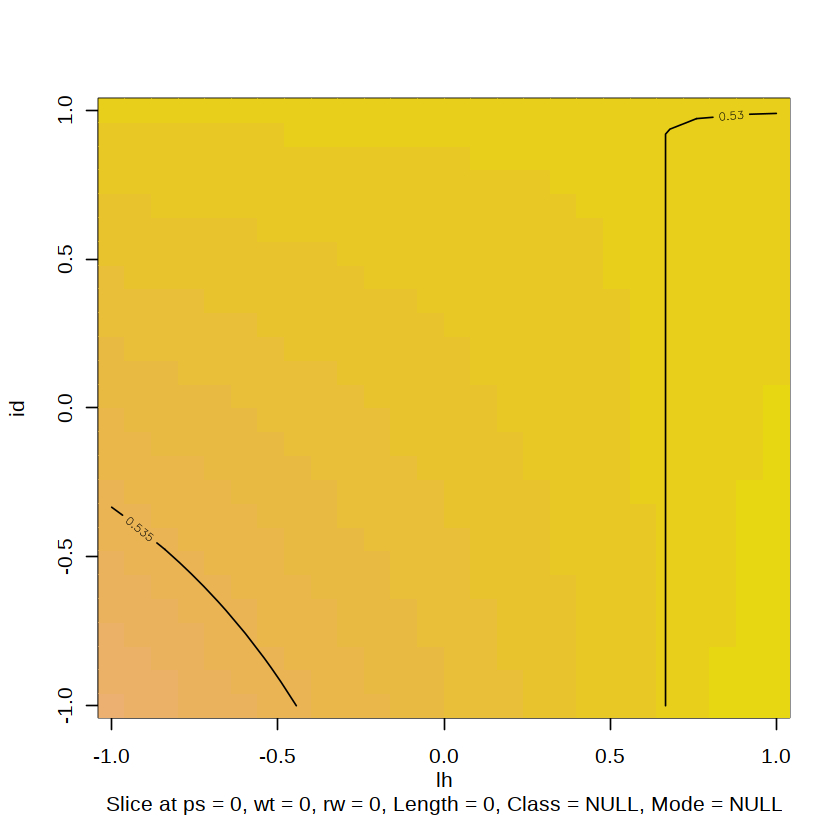

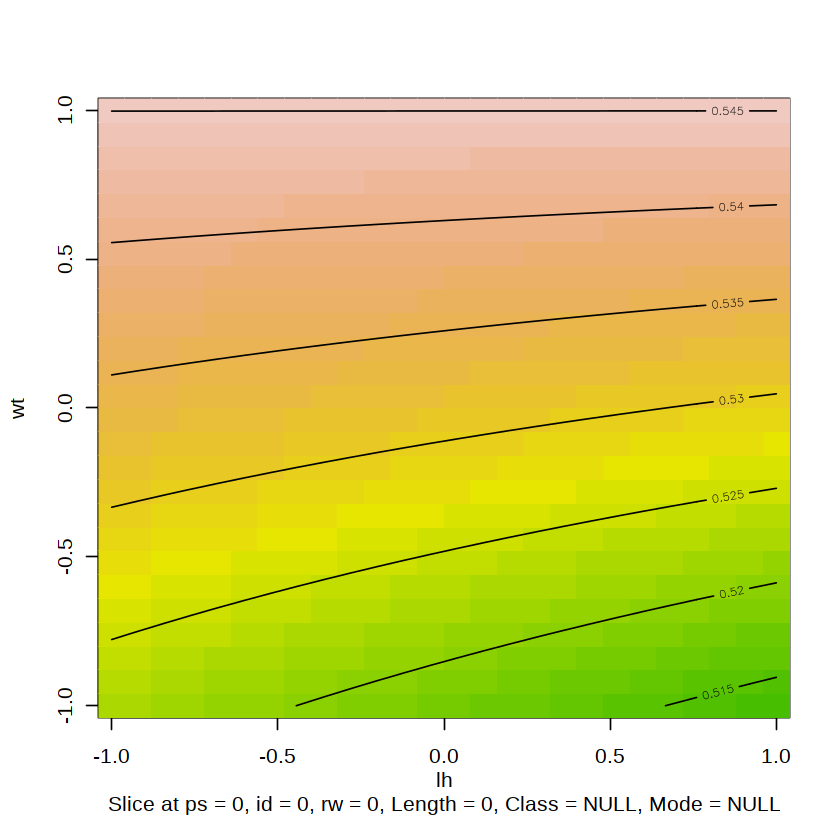

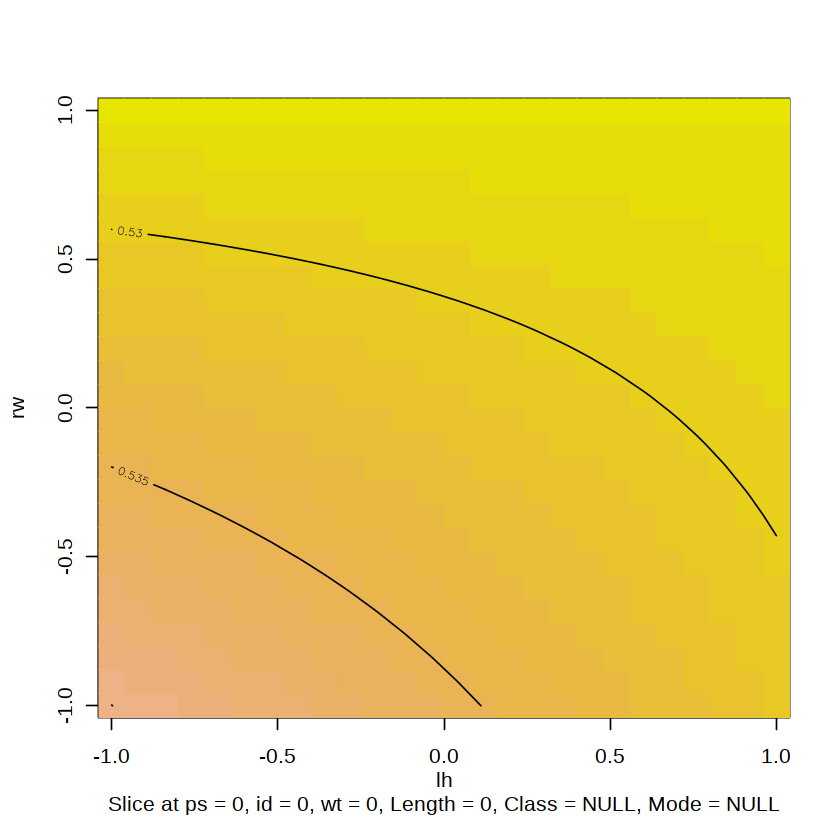

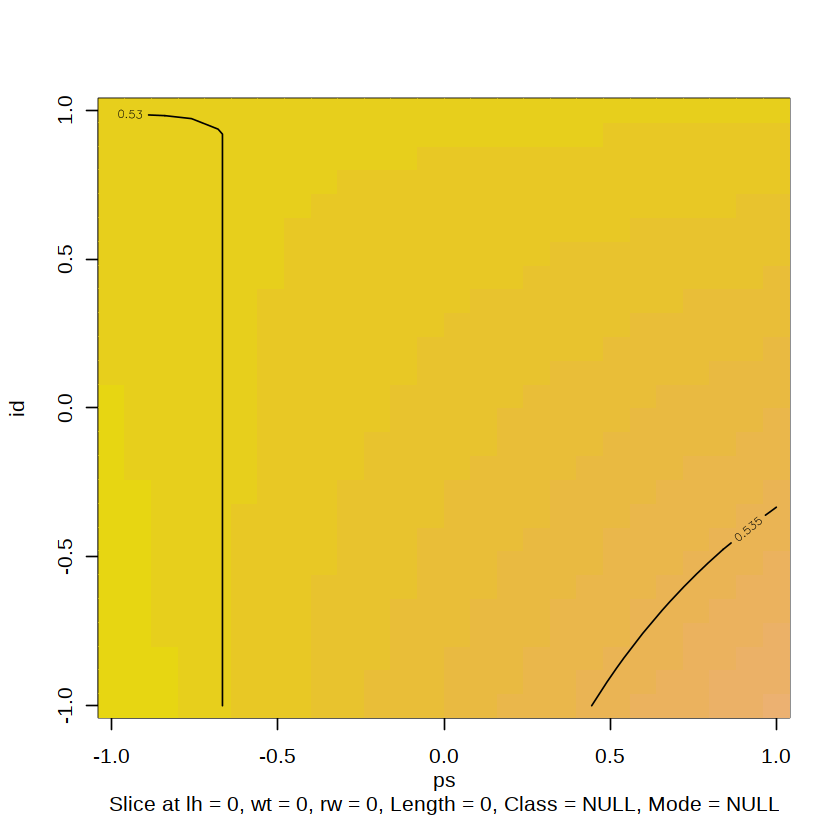

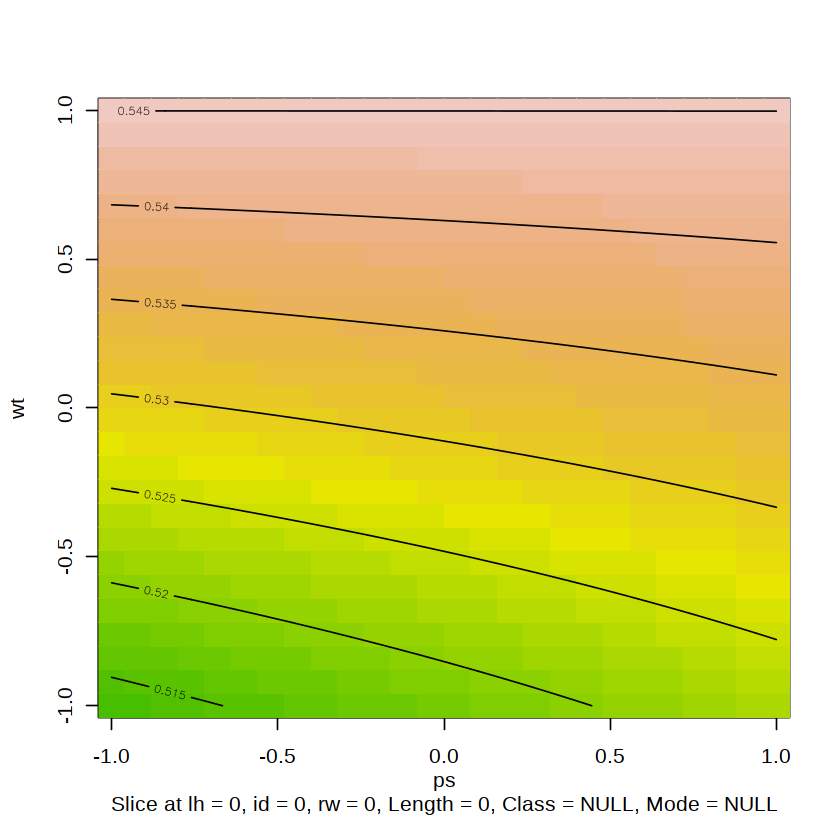

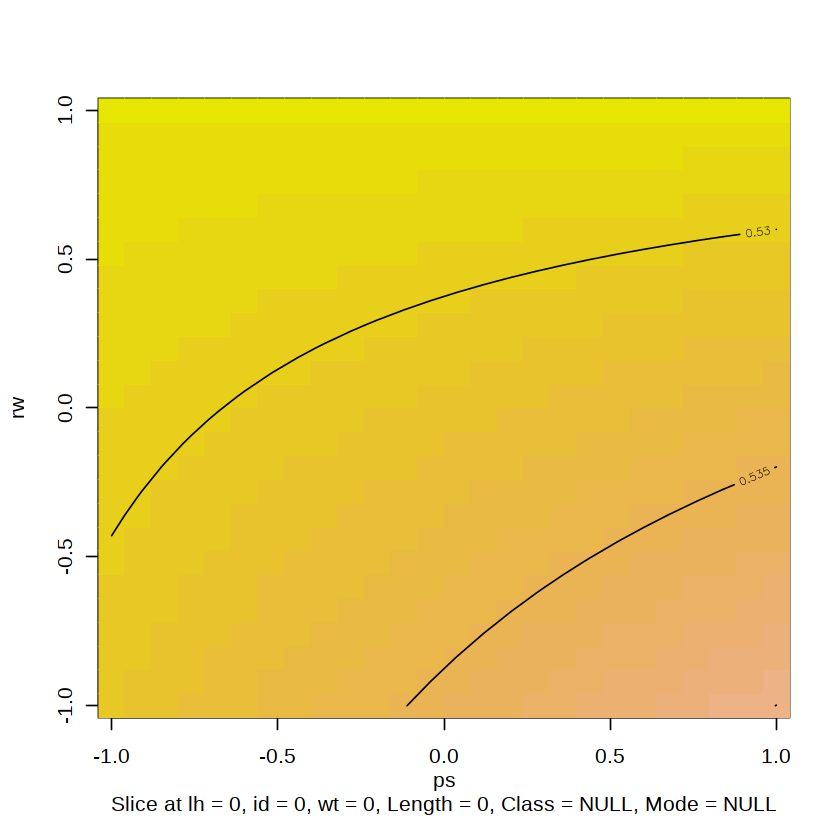

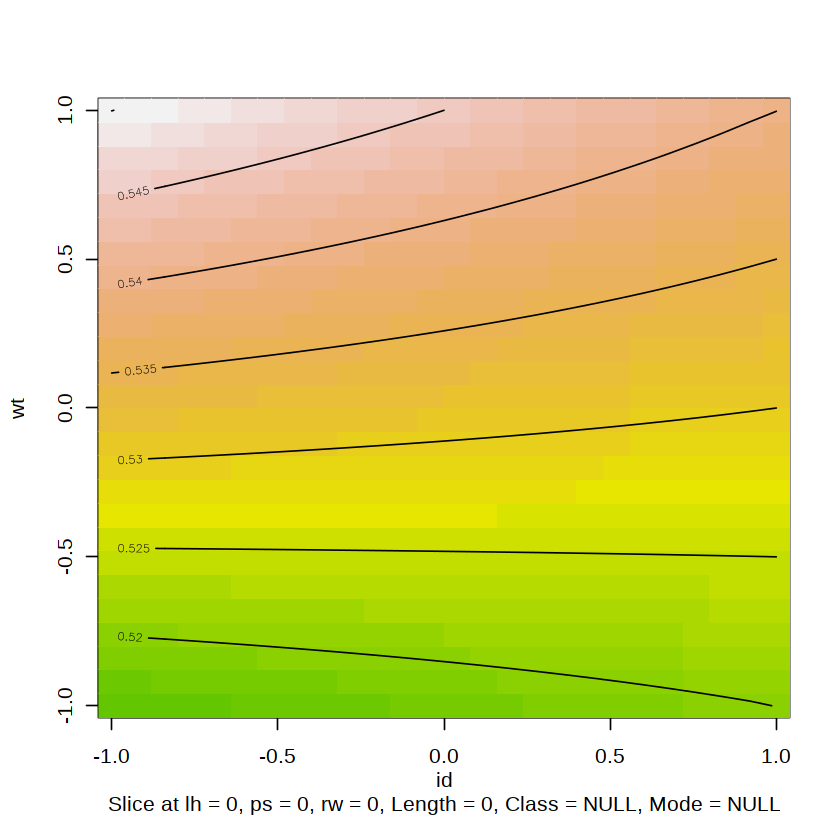

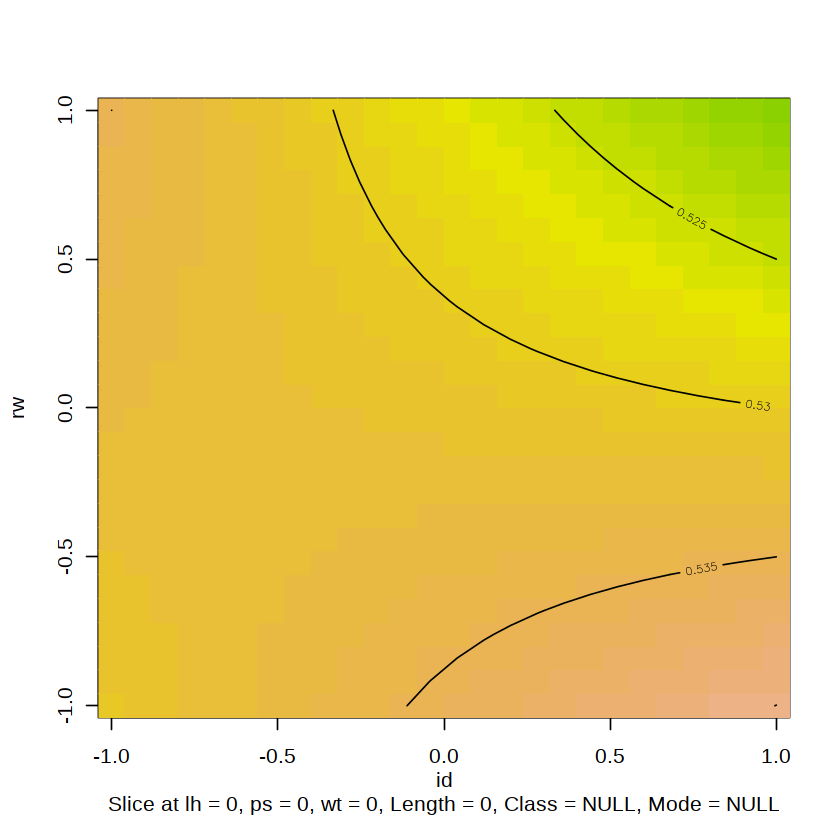

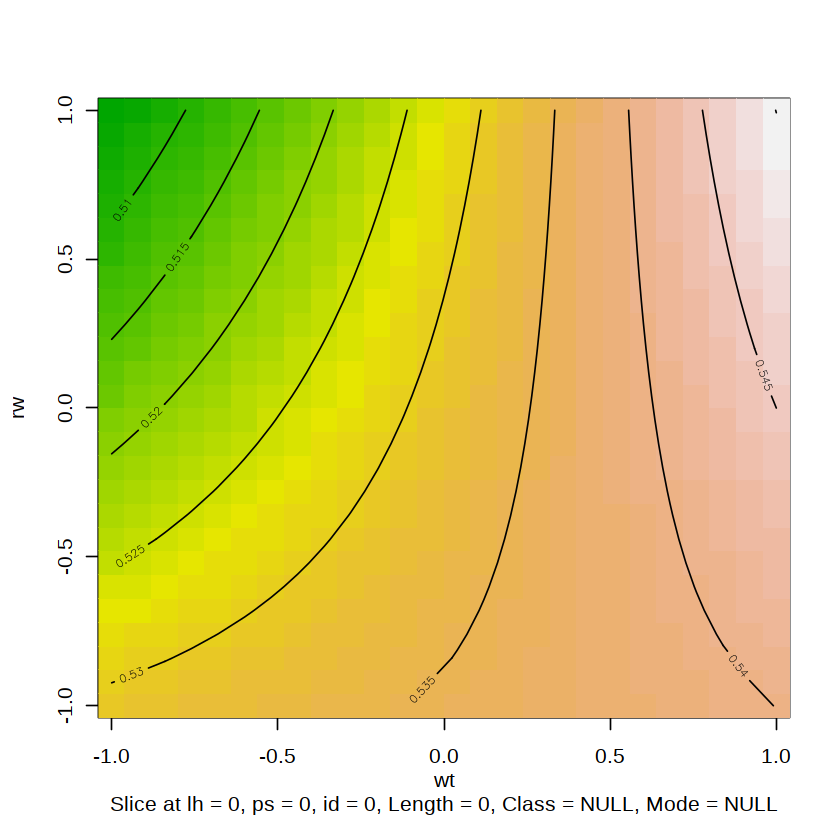

In [19]:
#contour plots 
par(mfrow=c(1,1))
suppressWarnings(
    contour(cost_rsm, ~lh + ps + id + wt + rw, image=TRUE, at=summary(cost_rsm$canoncial$xs))
    )


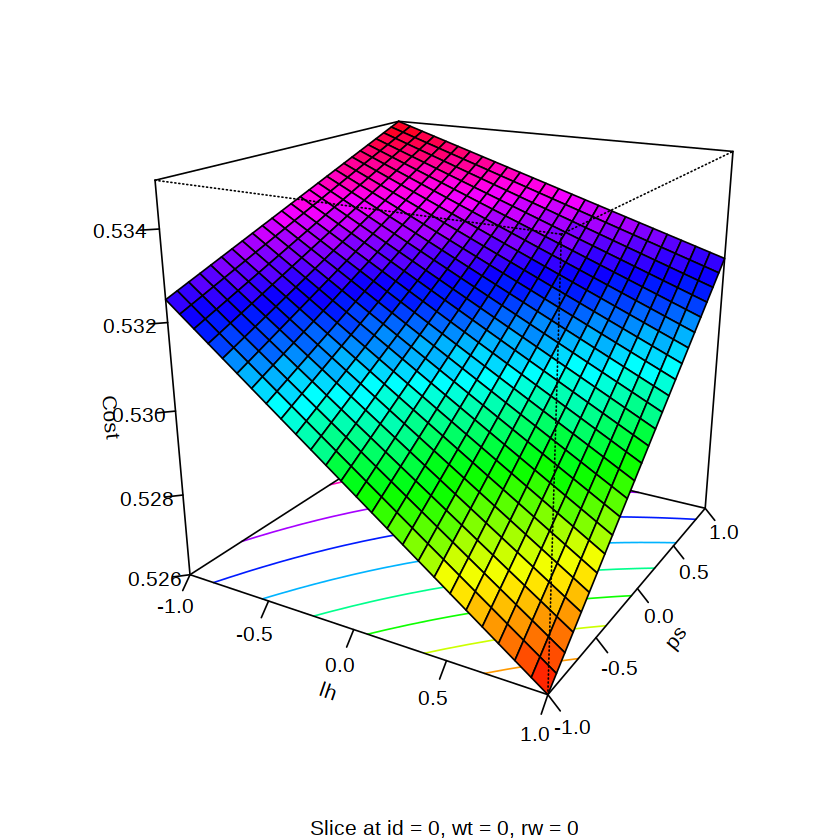

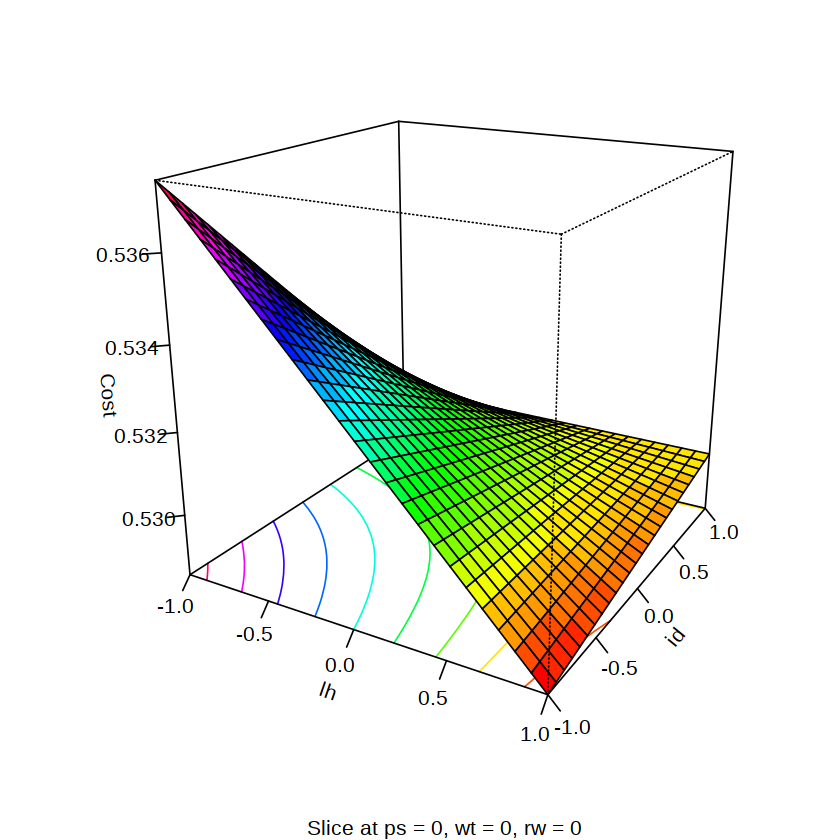

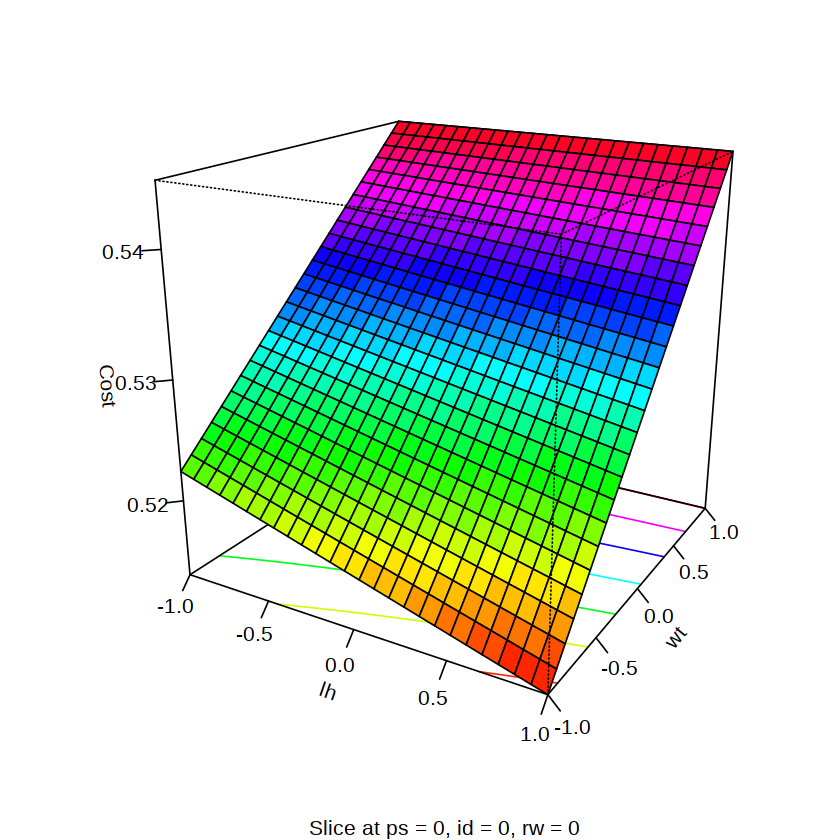

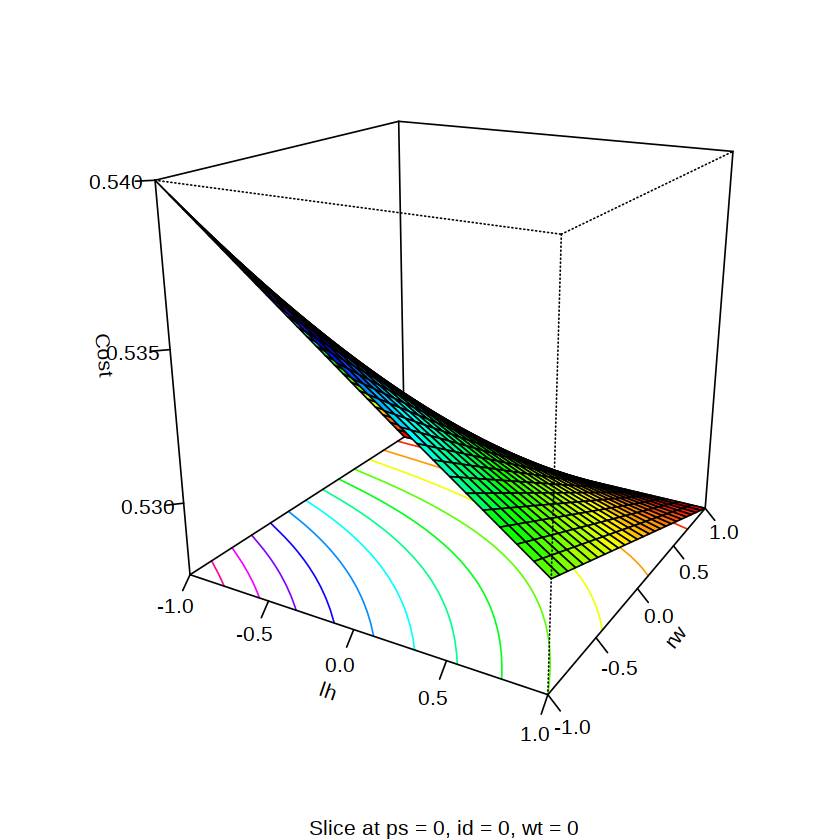

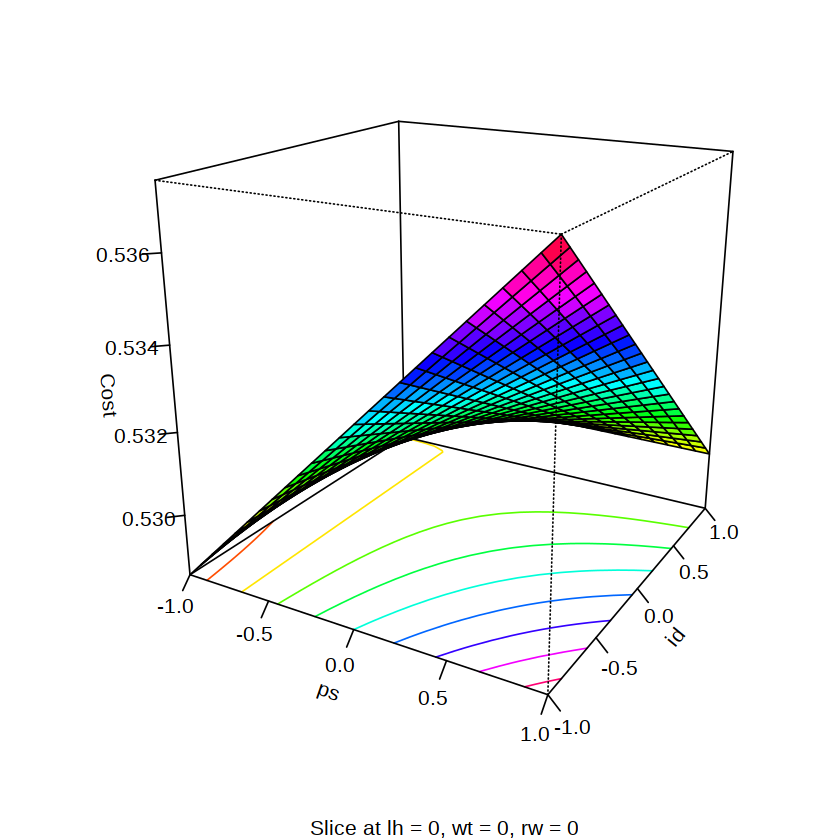

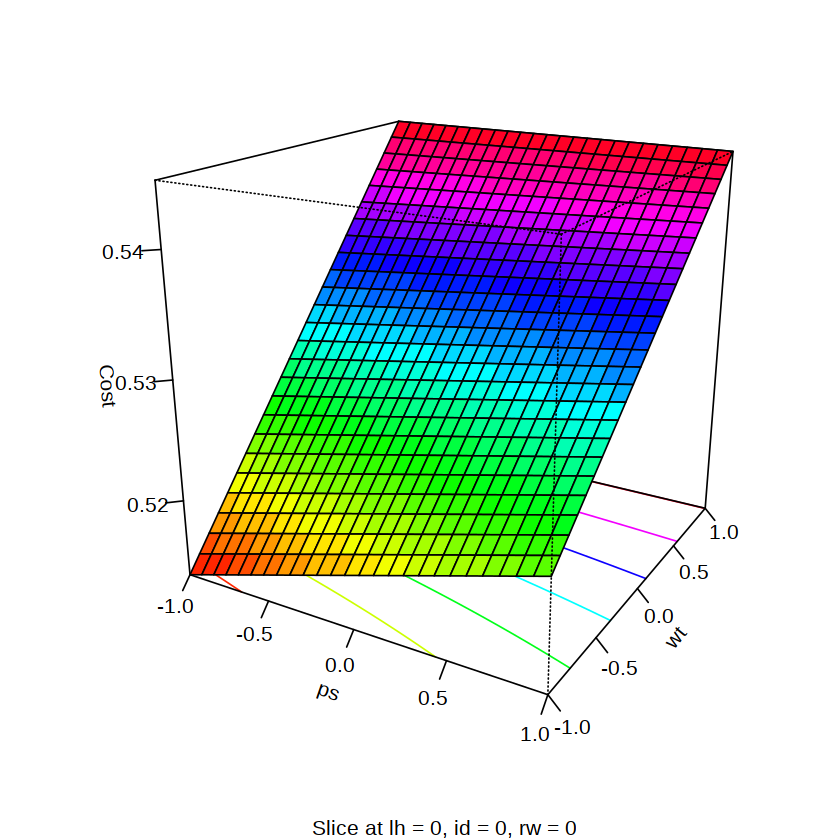

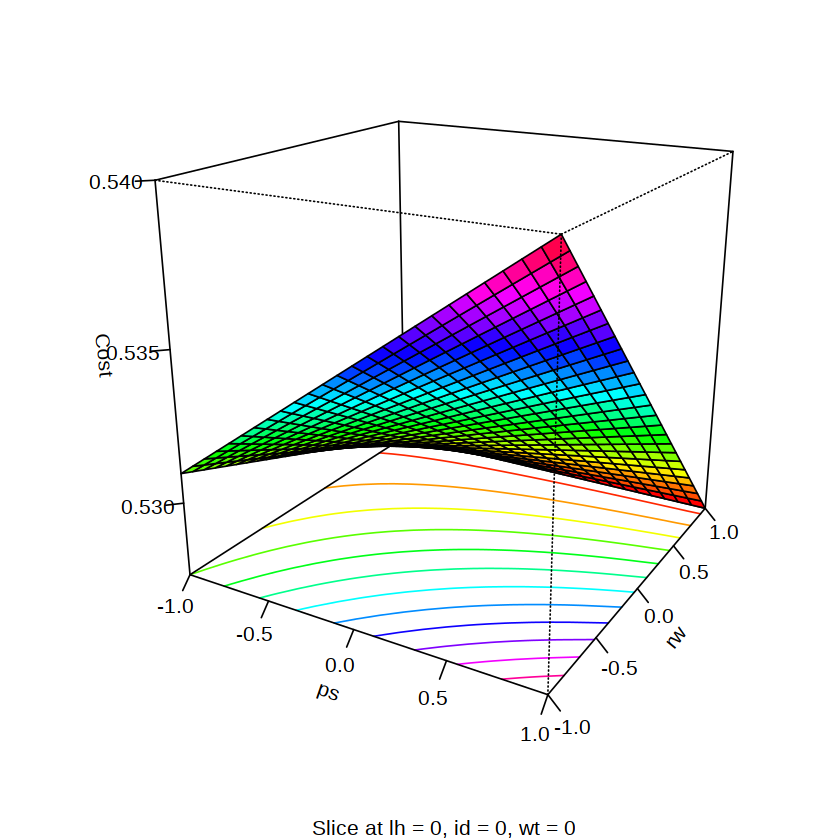

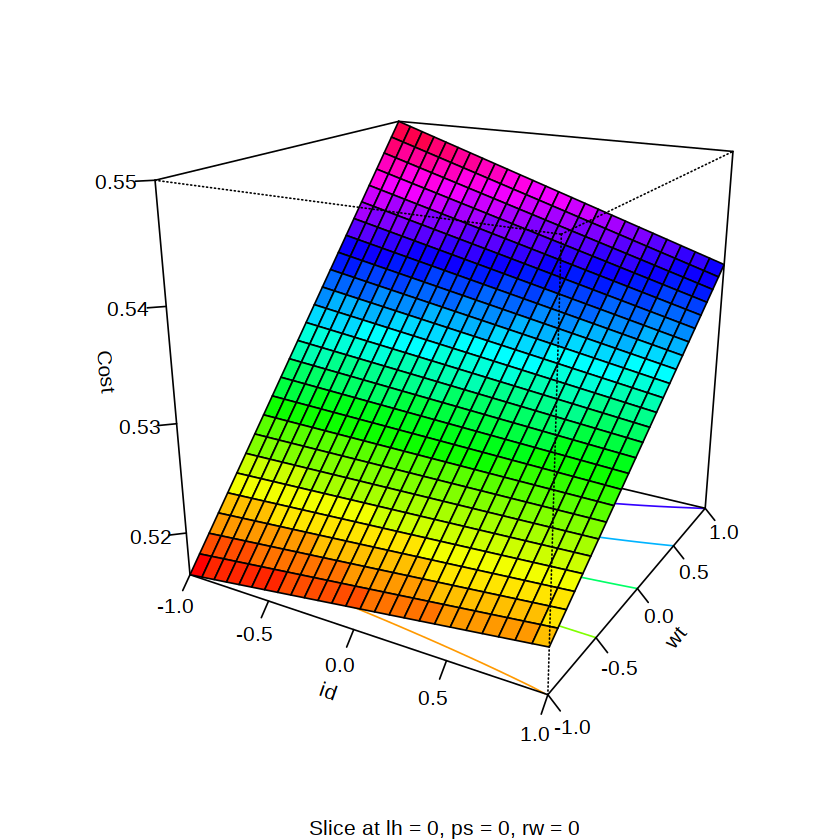

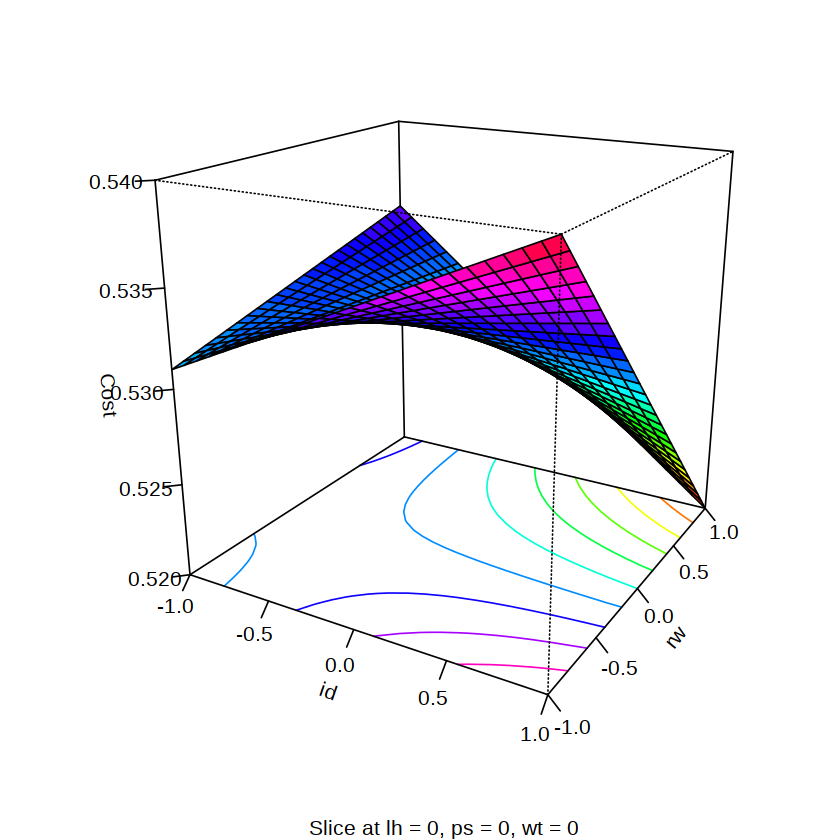

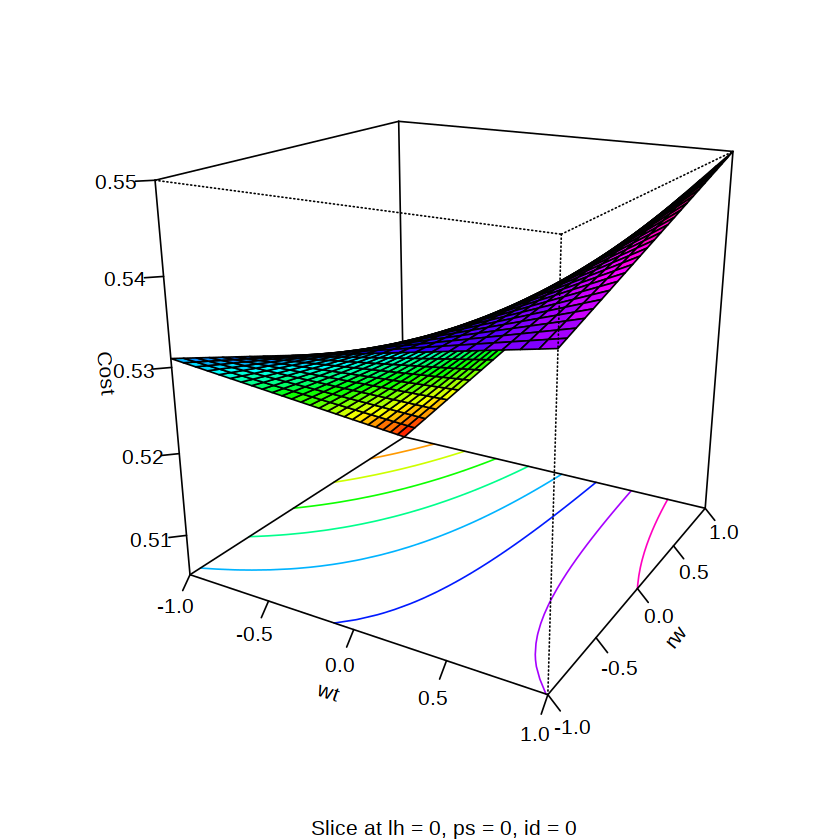

In [20]:
# Generate plots taking two factors at a time

par(mfrow=c(1,1))

suppressWarnings(
    persp(cost_rsm,~lh+ps,image=TRUE,contour="colors",zlab="Cost",theta=30)   
    )
suppressWarnings(
    persp(cost_rsm,~lh+id,image=TRUE,contour="colors",zlab="Cost",theta=30)   
    )
suppressWarnings(
    persp(cost_rsm,~lh+wt,image=TRUE,contour="colors",zlab="Cost",theta=30)   
    )
suppressWarnings(
    persp(cost_rsm,~lh+rw,image=TRUE,contour="colors",zlab="Cost",theta=30)   
    )
suppressWarnings(
    persp(cost_rsm,~ps+id,image=TRUE,contour="colors",zlab="Cost",theta=30)   
    )
suppressWarnings(
    persp(cost_rsm,~ps+wt,image=TRUE,contour="colors",zlab="Cost",theta=30)   
    )
suppressWarnings(
    persp(cost_rsm,~ps+rw,image=TRUE,contour="colors",zlab="Cost",theta=30)   
    )
suppressWarnings(
    persp(cost_rsm,~id+wt,image=TRUE,contour="colors",zlab="Cost",theta=30)   
    )
suppressWarnings(
    persp(cost_rsm,~id+rw,image=TRUE,contour="colors",zlab="Cost",theta=30)   
    )
suppressWarnings(
    persp(cost_rsm,~wt+rw,image=TRUE,contour="colors",zlab="Cost",theta=30)   
    )

In [21]:
## Time

In [22]:
df <- read.table(fn.data.time, header=TRUE)
str(df)

'data.frame':	16 obs. of  10 variables:
 $ lh   : int  -1 1 -1 1 -1 1 -1 1 -1 1 ...
 $ ps   : int  -1 -1 1 1 -1 -1 1 1 -1 -1 ...
 $ id   : int  -1 -1 -1 -1 1 1 1 1 -1 -1 ...
 $ wt   : int  -1 -1 -1 -1 -1 -1 -1 -1 1 1 ...
 $ rw   : int  1 -1 -1 1 -1 1 1 -1 -1 1 ...
 $ time1: int  8741 18098 14493 10191 14914 10423 16648 8534 15085 10624 ...
 $ time2: int  8743 18042 14469 10185 14873 10199 16652 10149 15111 10624 ...
 $ time3: int  8777 17930 14478 10199 15060 10345 16658 8492 15108 10644 ...
 $ time4: int  8733 18026 14448 10118 15063 10421 16653 8480 15115 10646 ...
 $ time5: int  8736 17634 14360 10200 15026 10422 16565 8538 15122 10579 ...


In [23]:
# reshape data into long format
df.time <- melt(df, id.vars = c("lh", "ps", "id", "wt", "rw"), variable.name = "rep", value.name = "time")

In [24]:
# Summary of the original data

summary(df.time)

       lh           ps           id           wt           rw        rep    
 Min.   :-1   Min.   :-1   Min.   :-1   Min.   :-1   Min.   :-1   time1:16  
 1st Qu.:-1   1st Qu.:-1   1st Qu.:-1   1st Qu.:-1   1st Qu.:-1   time2:16  
 Median : 0   Median : 0   Median : 0   Median : 0   Median : 0   time3:16  
 Mean   : 0   Mean   : 0   Mean   : 0   Mean   : 0   Mean   : 0   time4:16  
 3rd Qu.: 1   3rd Qu.: 1   3rd Qu.: 1   3rd Qu.: 1   3rd Qu.: 1   time5:16  
 Max.   : 1   Max.   : 1   Max.   : 1   Max.   : 1   Max.   : 1             
      time      
 Min.   : 8480  
 1st Qu.: 9464  
 Median :13333  
 Mean   :13132  
 3rd Qu.:15483  
 Max.   :48536  

In [25]:
time_rsm <- rsm(time ~ SO(lh, ps, id, wt, rw), data = df.time)

Warning message in rsm(time ~ SO(lh, ps, id, wt, rw), data = df.time):
“Some coefficients are aliased - cannot use 'rsm' methods.
  Returning an 'lm' object.”


In [26]:
# externally Studentized residuals
time_rsm$studres <- rstudent(time_rsm)
summary(time_rsm)


Call:
rsm(formula = time ~ SO(lh, ps, id, wt, rw), data = df.time)

Residuals:
    Min      1Q  Median      3Q     Max 
-6370.6   -86.3    -0.7    27.7 25359.4 

Coefficients: (5 not defined because of singularities)
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  13131.87     399.51  32.870  < 2e-16 ***
FO(lh, ps, id, wt, rw)lh     -2415.95     399.51  -6.047 8.41e-08 ***
FO(lh, ps, id, wt, rw)ps        70.95     399.51   0.178 0.859603    
FO(lh, ps, id, wt, rw)id      -471.45     399.51  -1.180 0.242337    
FO(lh, ps, id, wt, rw)wt       363.97     399.51   0.911 0.365683    
FO(lh, ps, id, wt, rw)rw       148.50     399.51   0.372 0.711339    
TWI(lh, ps, id, wt, rw)lh:ps -1509.62     399.51  -3.779 0.000348 ***
TWI(lh, ps, id, wt, rw)lh:id  -649.18     399.51  -1.625 0.109091    
TWI(lh, ps, id, wt, rw)lh:wt -1479.35     399.51  -3.703 0.000446 ***
TWI(lh, ps, id, wt, rw)lh:rw  -700.03     399.51  -1.752 0.084526 .  
TWI(lh, ps, 

In [27]:
## generate ANOVA table for selected model
anova(time_rsm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
"FO(lh, ps, id, wt, rw)",5,497491477,99498295,7.792465,8.912666e-06
"TWI(lh, ps, id, wt, rw)",10,841882988,84188299,6.593423,6.349411e-07
Residuals,64,817185688,12768526,NA,NA


In [28]:
lm_time3lvl <- lm(time ~ (lh+ ps+ id+ wt+ rw)^3, data = df.time)
# externally Studentized residuals
lm_time3lvl$studres <- rstudent(lm_time3lvl)
summary(lm_time3lvl)


Call:
lm(formula = time ~ (lh + ps + id + wt + rw)^3, data = df.time)

Residuals:
    Min      1Q  Median      3Q     Max 
-6370.6   -86.3    -0.7    27.7 25359.4 

Coefficients: (10 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13131.87     399.51  32.870  < 2e-16 ***
lh          -2415.95     399.51  -6.047 8.41e-08 ***
ps             70.95     399.51   0.178 0.859603    
id           -471.45     399.51  -1.180 0.242337    
wt            363.97     399.51   0.911 0.365683    
rw            148.50     399.51   0.372 0.711339    
lh:ps       -1509.62     399.51  -3.779 0.000348 ***
lh:id        -649.18     399.51  -1.625 0.109091    
lh:wt       -1479.35     399.51  -3.703 0.000446 ***
lh:rw        -700.03     399.51  -1.752 0.084526 .  
ps:id        -426.47     399.51  -1.068 0.289756    
ps:wt         313.35     399.51   0.784 0.435734    
ps:rw        1519.67     399.51   3.804 0.000321 ***
id:wt        -409.30     399.51  -1.

## Time Interaction Plots

### Interactions: Layer Height

In [29]:
## Generate interaction plots.

par(mfrow=c(2,1), bg=rgb(1,1,0.8), mar=c(5, 8, 2, 4))

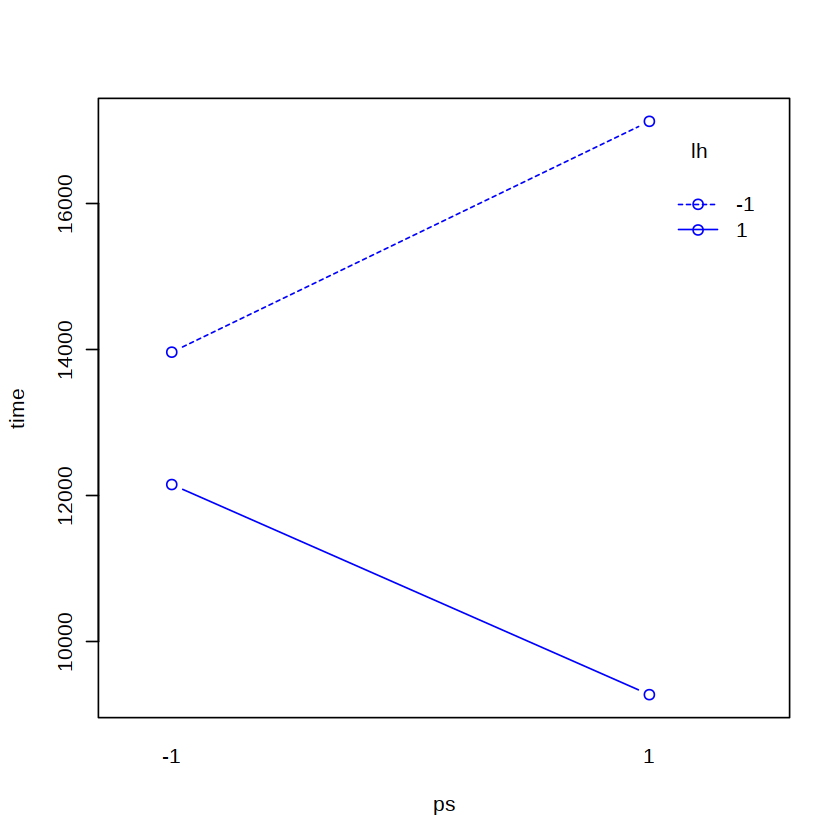

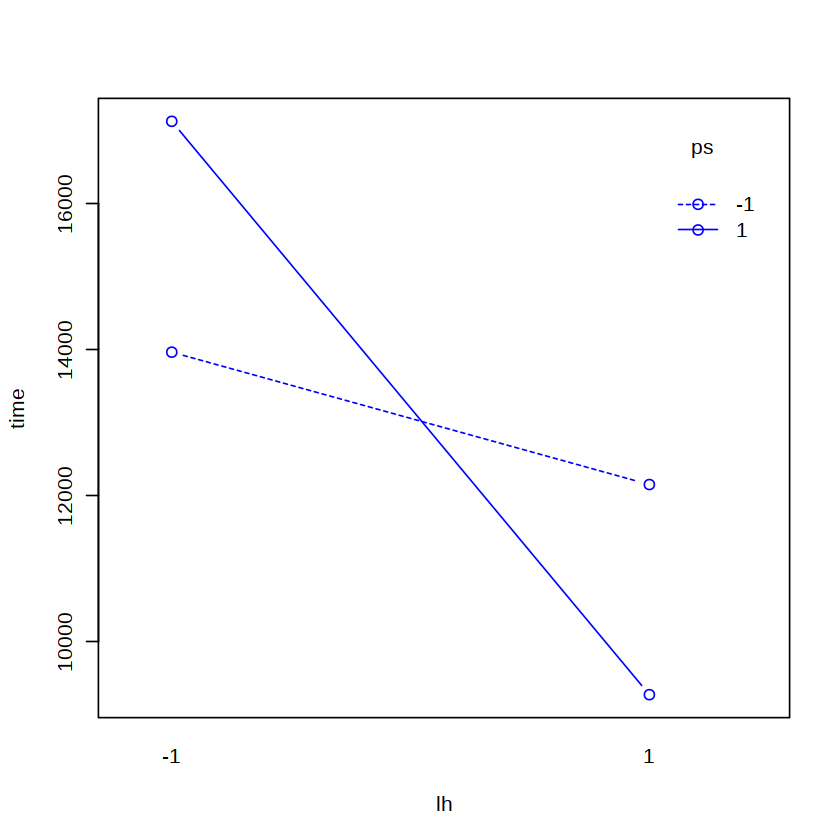

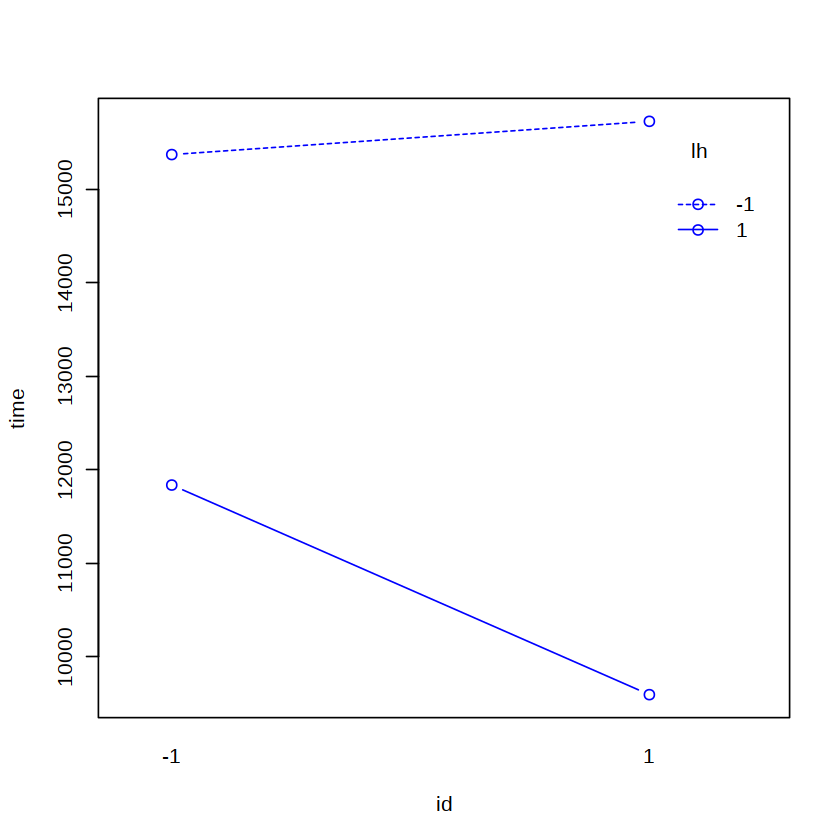

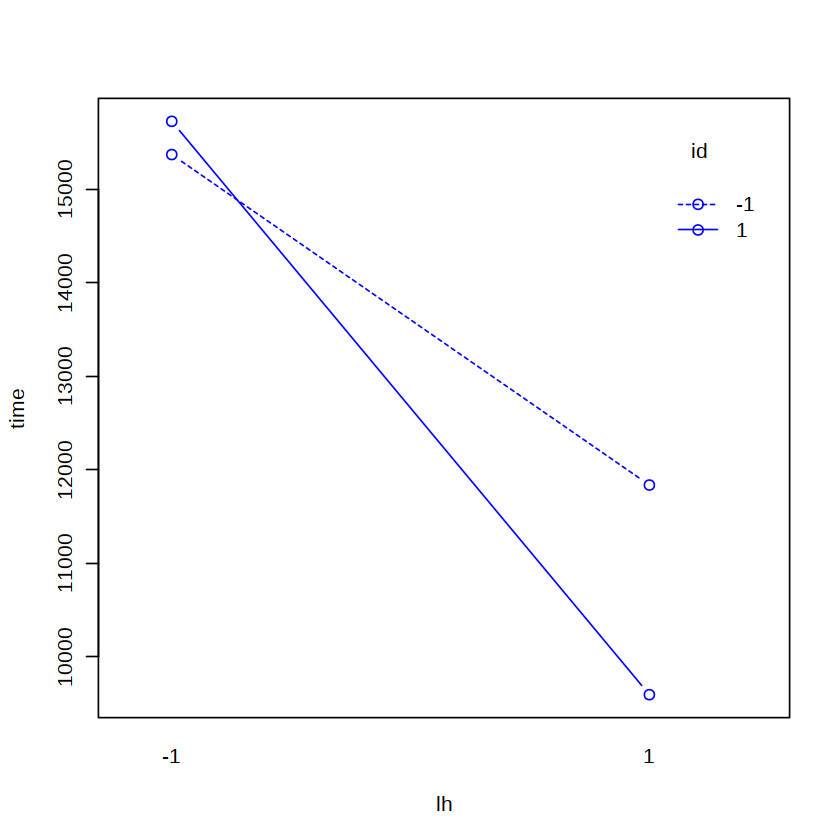

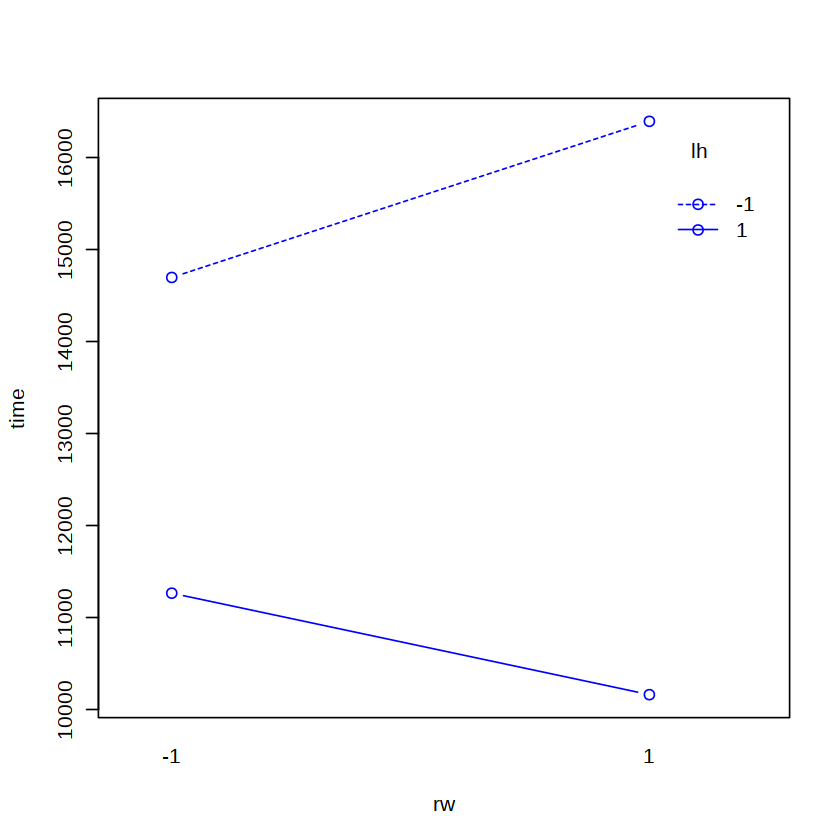

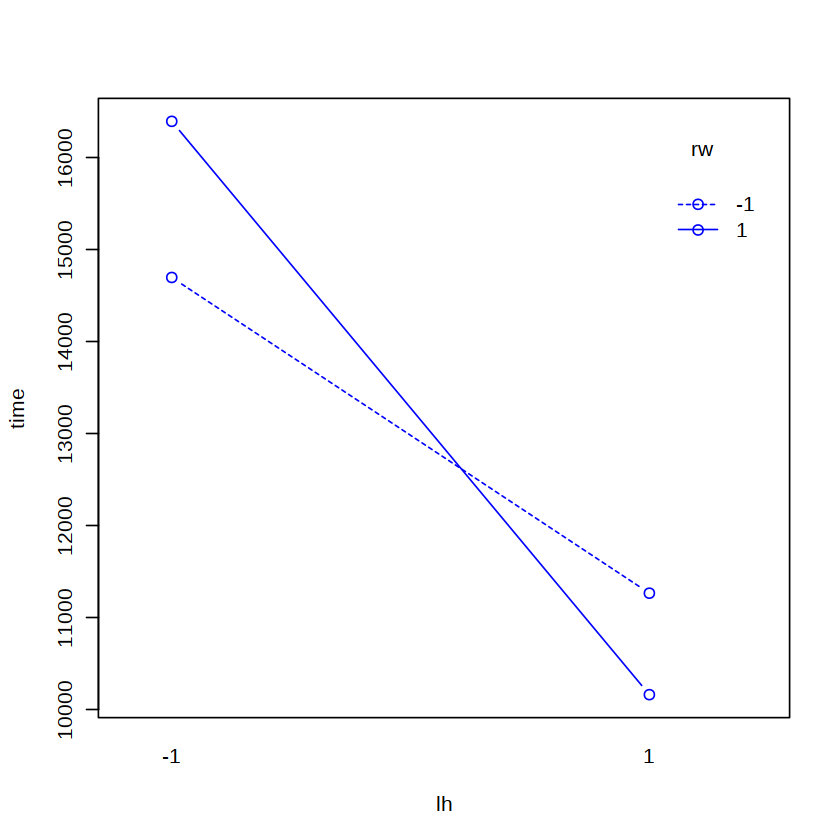

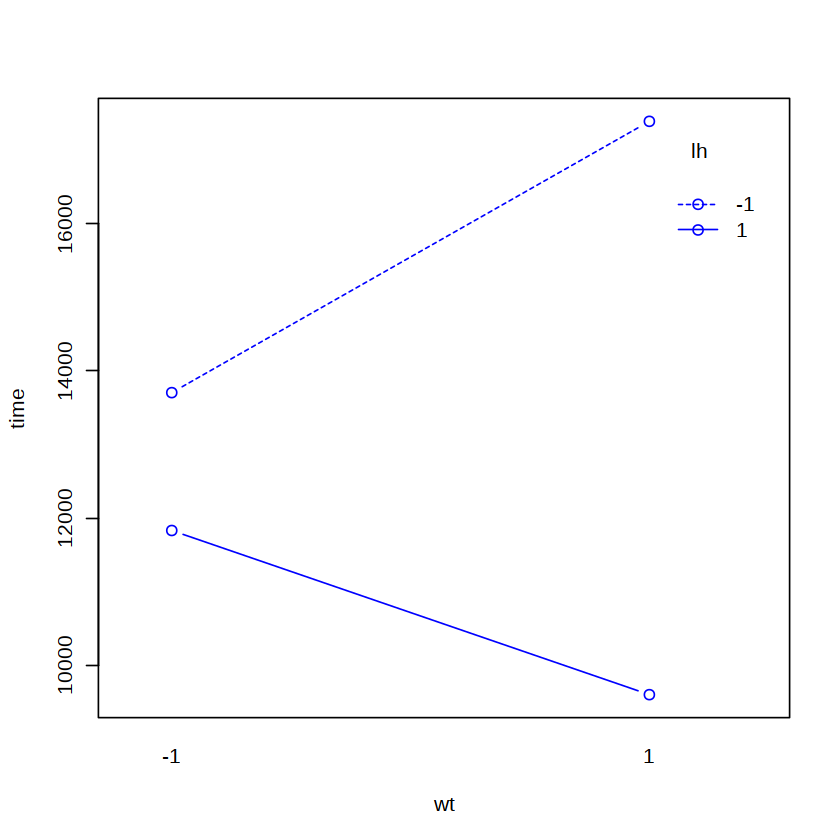

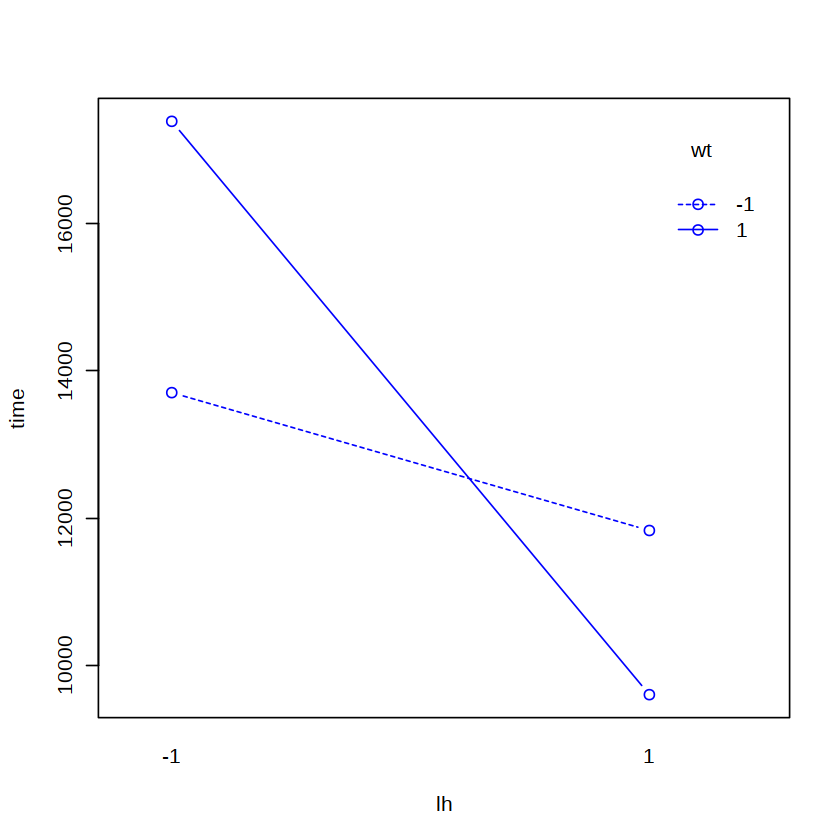

In [30]:
interaction.plot(df.time$ps, df.time$lh, df.time$time, fun=mean,type="b", pch=c(21,21), col=4,xlab="ps", ylab="time", trace.lab="lh")

interaction.plot(df.time$lh, df.time$ps, df.time$time, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="ps", ylab="time", xlab="lh")

interaction.plot(df.time$id, df.time$lh, df.time$time, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="id", ylab="time", trace.lab="lh")

interaction.plot(df.time$lh, df.time$id, df.time$time, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="id", ylab="time", xlab="lh")

interaction.plot(df.time$rw, df.time$lh, df.time$time, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="rw", ylab="time", trace.lab="lh")

interaction.plot(df.time$lh, df.time$rw, df.time$time, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="rw", ylab="time", xlab="lh")

interaction.plot(df.time$wt, df.time$lh, df.time$time, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 xlab="wt", ylab="time", trace.lab="lh")

interaction.plot(df.time$lh, df.time$wt, df.time$time, fun=mean,
                 type="b", pch=c(21,21), col=4,
                 trace.lab="wt", ylab="time", xlab="lh")